In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)

In [3]:
'''
getting some data
'''
from eden.converter.graph.gspan import gspan_to_eden
def getgraphs():
    return  gspan_to_eden( 'bursi.pos.gspan' )


We work on this graph


/home/ikea/.local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/ikea/.local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


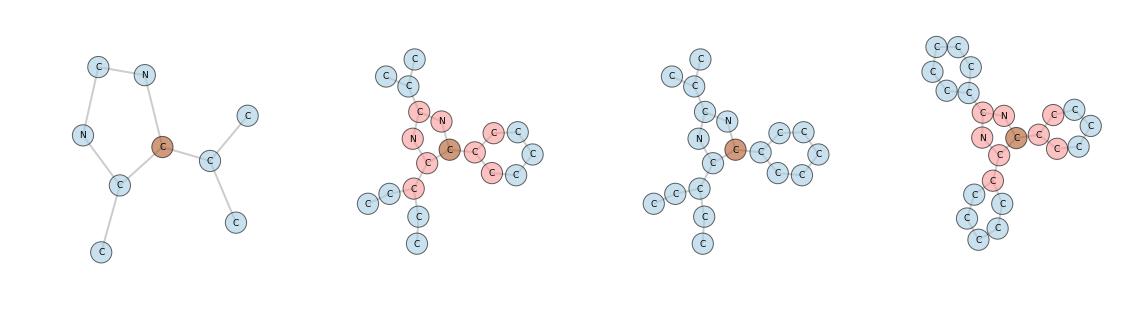

In [4]:
'''
first we test the core/interface extractor, since it is most essential
'''
import sys
sys.path.append('..')
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
from graphlearn import graphtools as gt
import graphlearn.utils.draw as myutils
import eden.graph as eg
import graphlearn.graphlearn as gl
import numpy as np

from eden.graph import Vectorizer
vectorizer=Vectorizer()

#get a graph
graphs = gspan_to_eden( 'bursi.pos.gspan' )
graph=graphs.next()
from eden.util import display
from eden.modifier.graph.vertex_attributes import colorize  
graphs = colorize([graph],output_attribute = 'color_level', labels = ['C','O','N','P','Cl','Br','S'])    
graph=graphs.next()
print 'We work on this graph'
display.draw_graph(graph, size=10, secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                   vertex_alpha=0.5, node_size=650)


def mark_and_draw(cip):
    graph=myutils.cip_to_graph(cip)
    myutils.draw_graph_set_graphlearn(graph, 
                           n_graphs_per_line=7, size=5, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450)
    
radius_list=[0,2]
thickness_list=[2,4]
cip=gl.extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
mark_and_draw(cip)

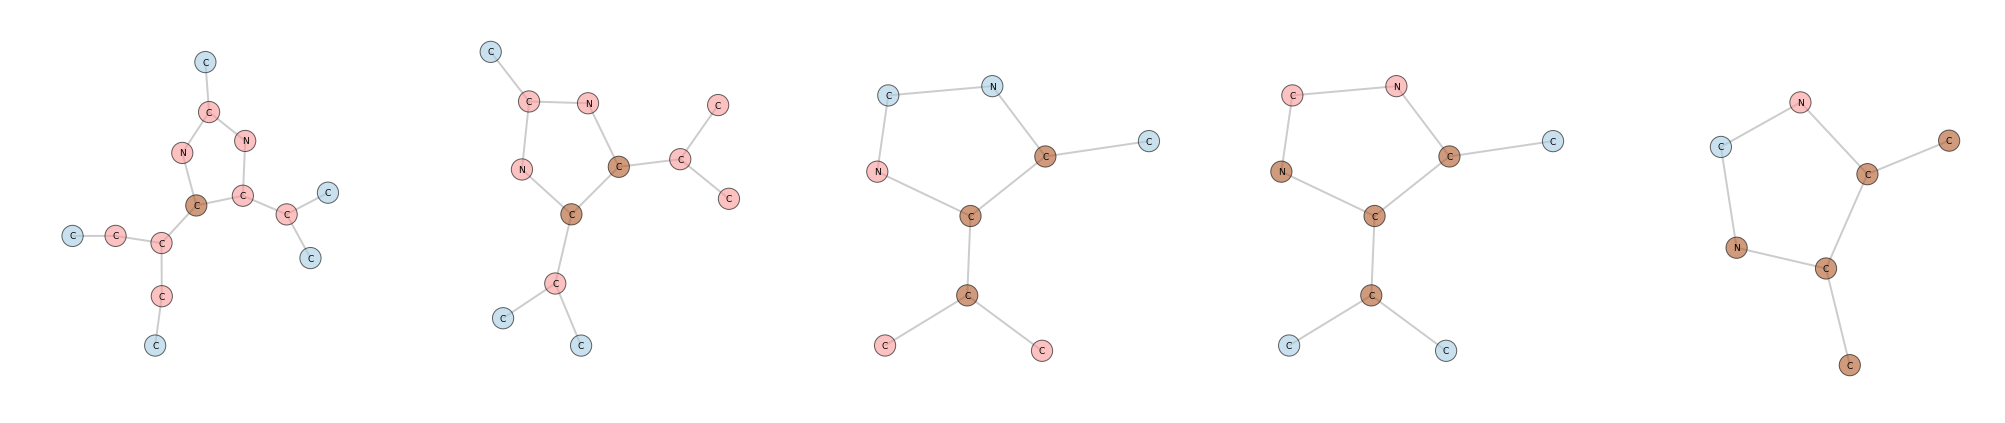

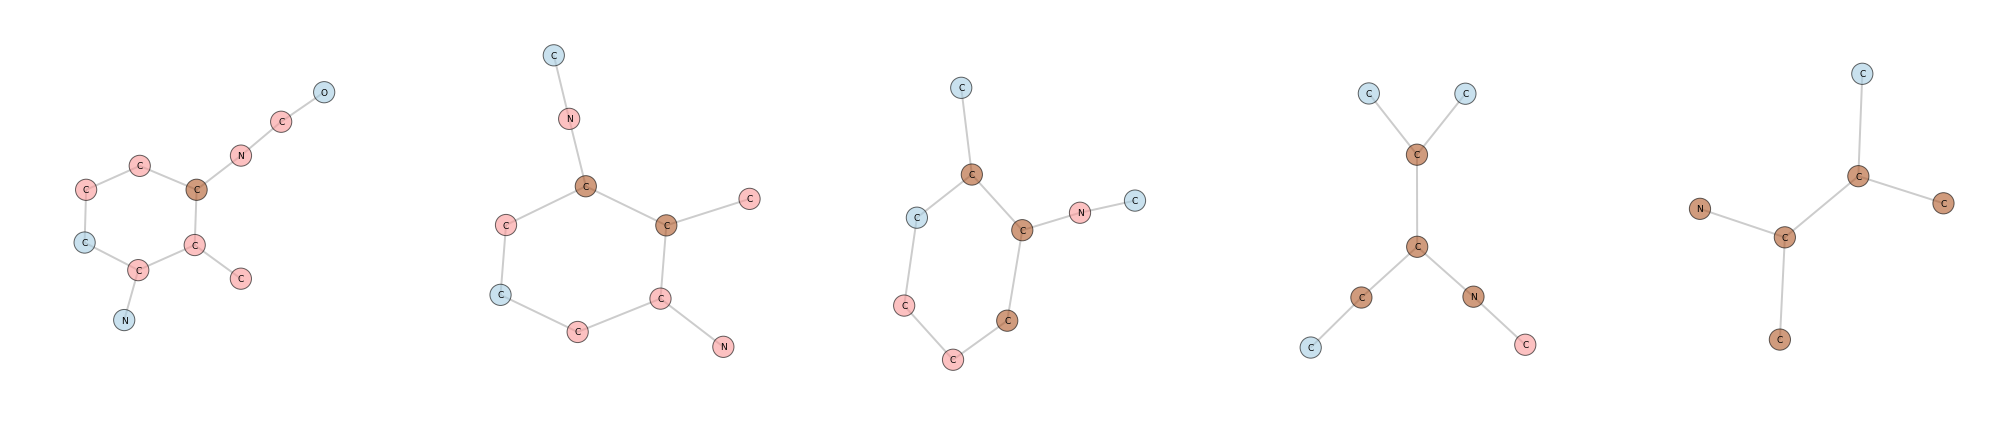

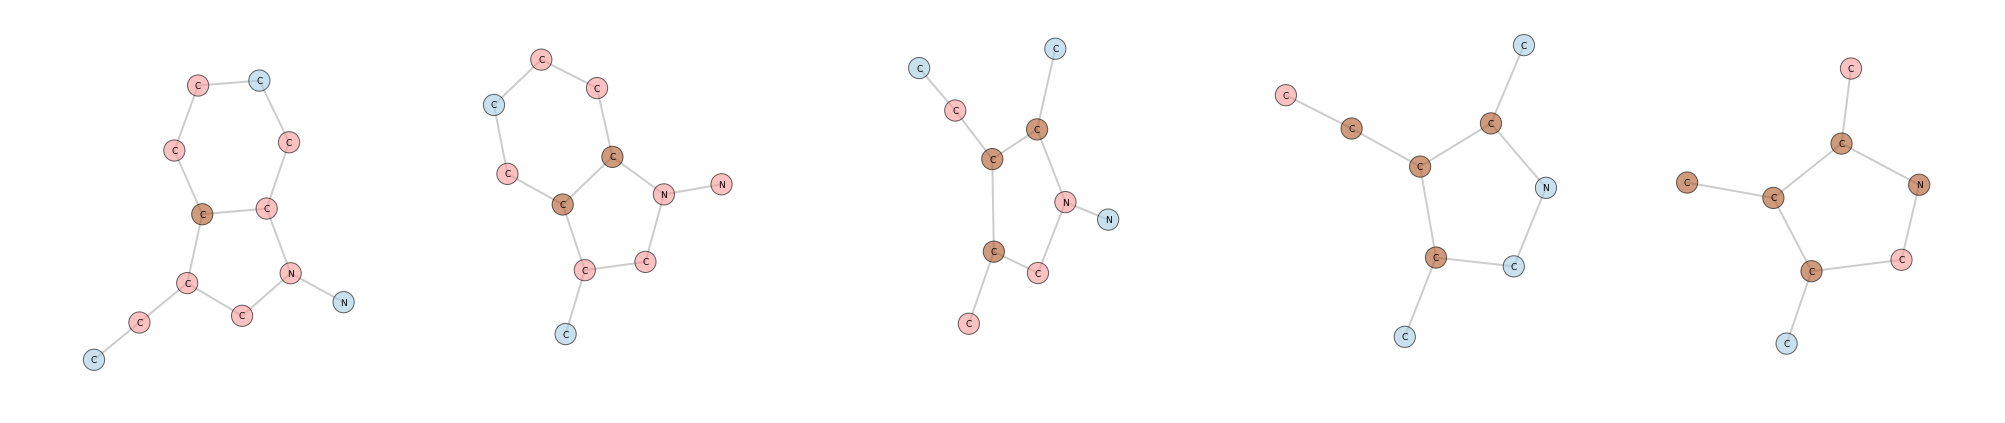

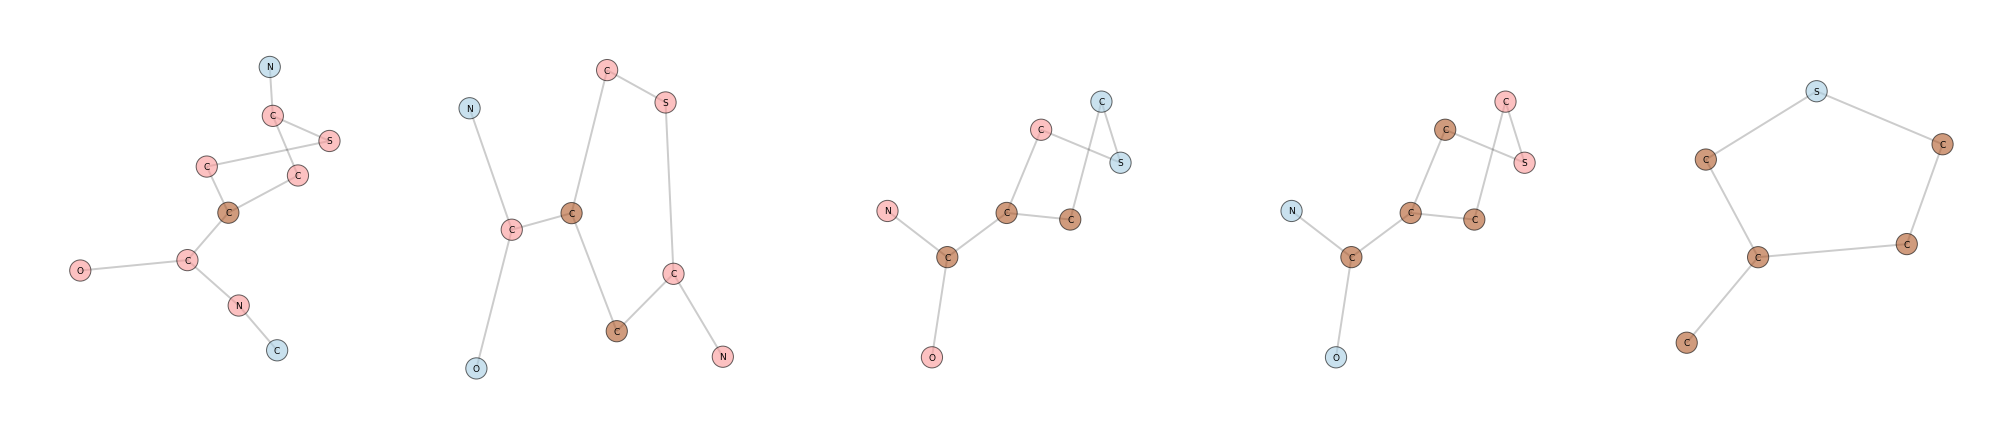

In [5]:
'''
demonstrating more extract core
'''
%matplotlib inline
import os
os.nice(20)
from eden.converter.graph.gspan import gspan_to_eden
from graphlearn.utils.draw import draw_graph_set_graphlearn
import eden.graph as eg
import graphlearn.graphlearn as gl

#get 5 grtaphs...
gr = gspan_to_eden( 'bursi.pos.gspan' )

from eden.graph import Vectorizer
v=Vectorizer()



for x in range (5):
    g=gr.next()
    #g=v._edge_to_vertex_transform(g)
    # for each, pick 5 cores and extract cips 
    #myutils.display(g,vertex_label='id')
    nice_graphs=[]
    for node in range(5):
        a=gl.extract_core_and_interface(node,g,radius_list=[2],thickness_list=[1],vectorizer=eg.Vectorizer())
        # draw cip on the original graph and save in nice_graphs
        #nice_graphs+=myutils.cip_to_graph(a, graphs=[g,g])
        newgraphs=myutils.cip_to_graph(a)
        for g,c in zip(newgraphs,a):
            g.graph['info']=str(c.interface_hash)
        nice_graphs+=newgraphs
        
    # draw nice_graphs
    myutils.draw_graph_set_graphlearn(nice_graphs, contract=False,
                           n_graphs_per_line=5, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

In [6]:
%%time
'''
second is reading a grammar and training an estimator
'''
import os 
os.nice(20)

import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools

# learn a grammar
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
training_size=300
training_graphs = itertools.islice(training_graphs,training_size)
sampler=gl.GraphLearnSampler(radius_list=[0,1,2],
                             thickness_list=[1.5,2],
                             min_cip_count=1, 
                             min_interface_count=5)
sampler.fit(training_graphs,n_jobs=-1,batch_size=10)
sampler.save('tmp/demo_300.ge')


Classifier:
SGDClassifier(alpha=0.000883314269265, average=False, class_weight=None,
       epsilon=0.1, eta0=0.12309808443, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=81, n_jobs=1,
       penalty='l1', power_t=0.956245538802, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
Saved model: tmp/demo_300.ge
CPU times: user 1min 12s, sys: 1.77 s, total: 1min 14s
Wall time: 1min 52s


interface: 622750


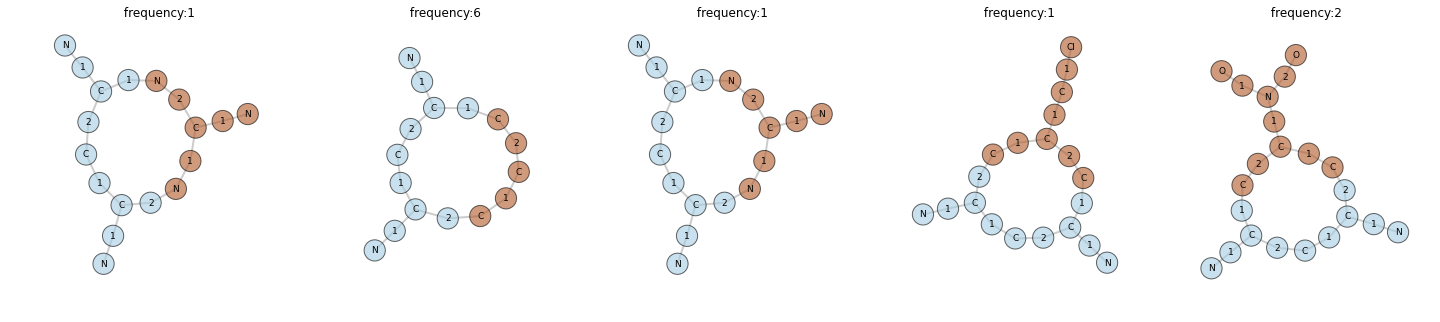

interface: 590074


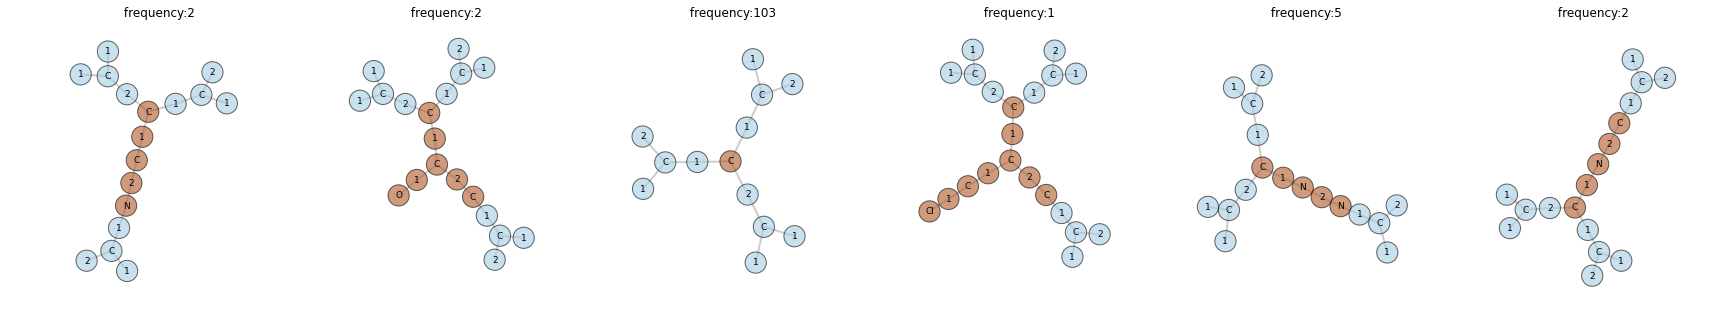

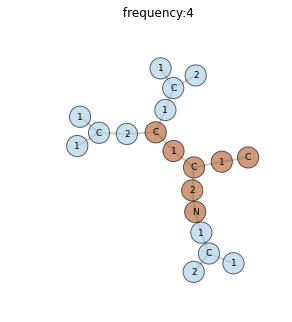

interface: 196875


interface: 327966


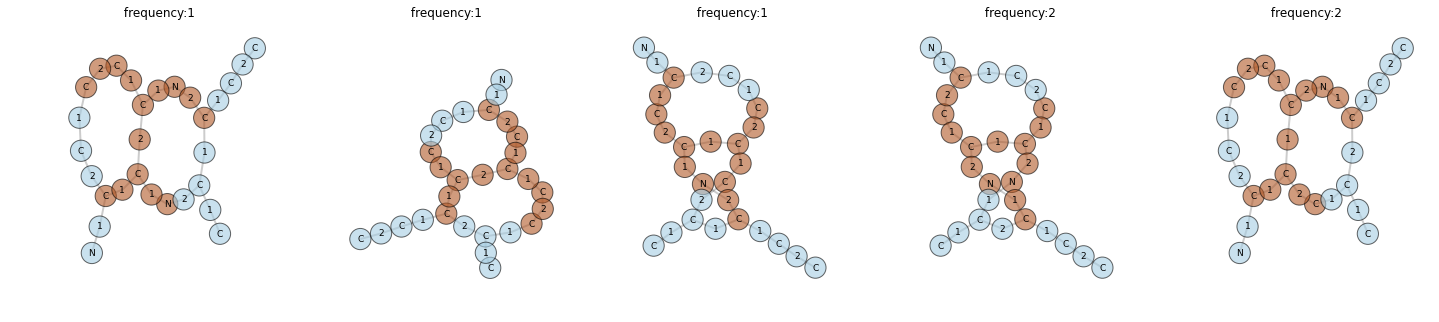

interface: 950691


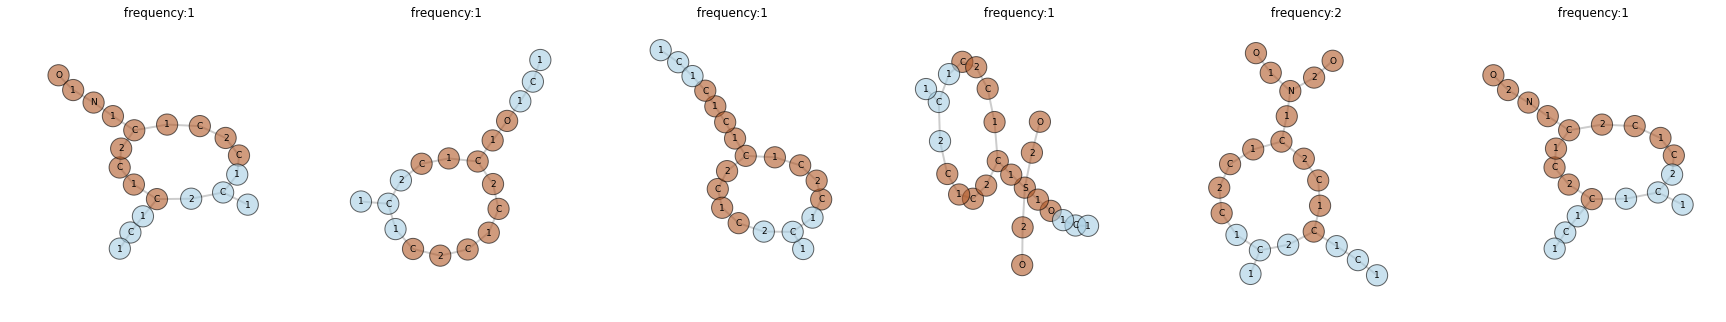

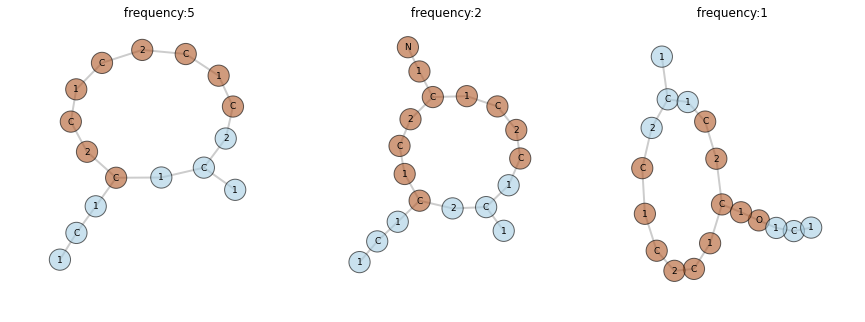

interface: 590297


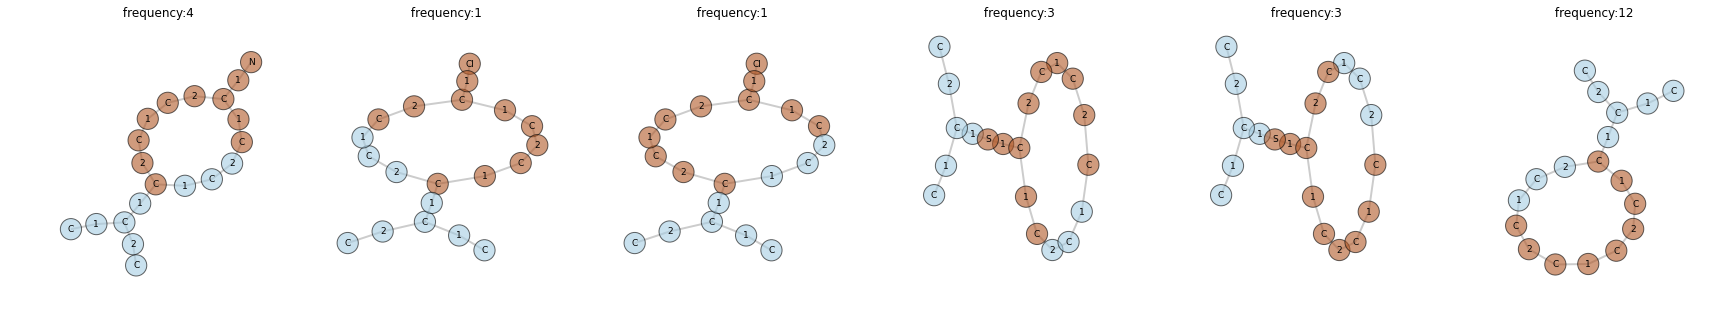

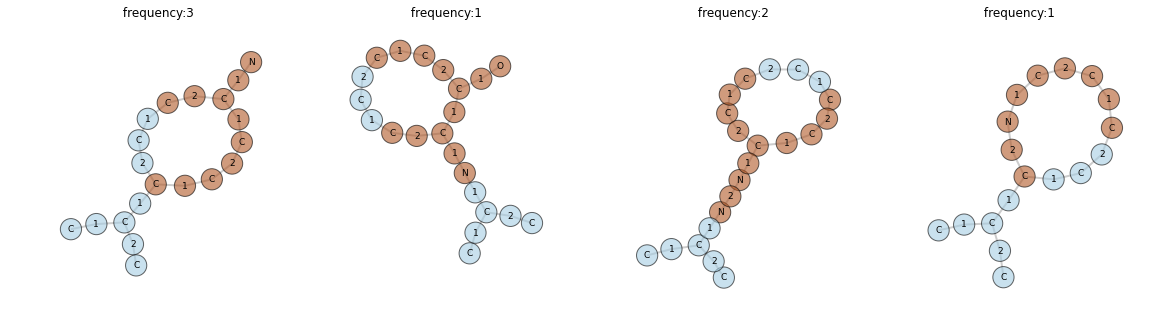

interface: 491624


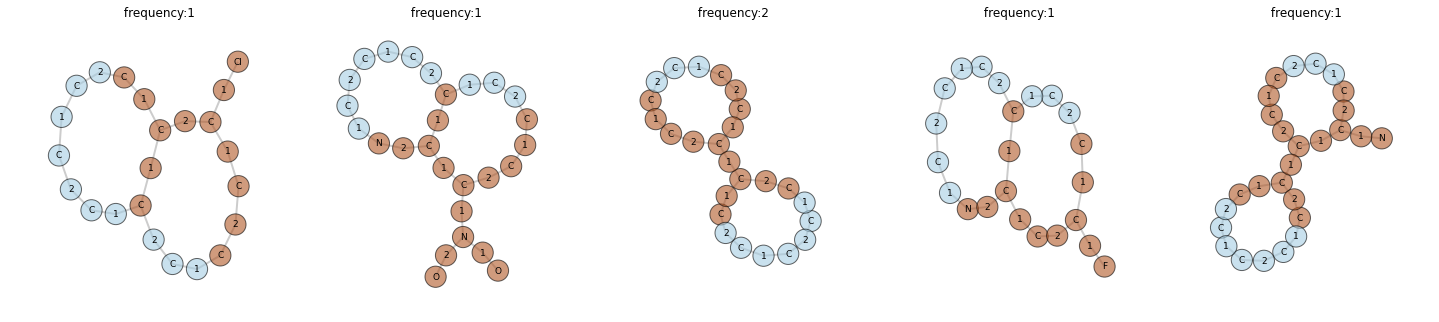

interface: 371498


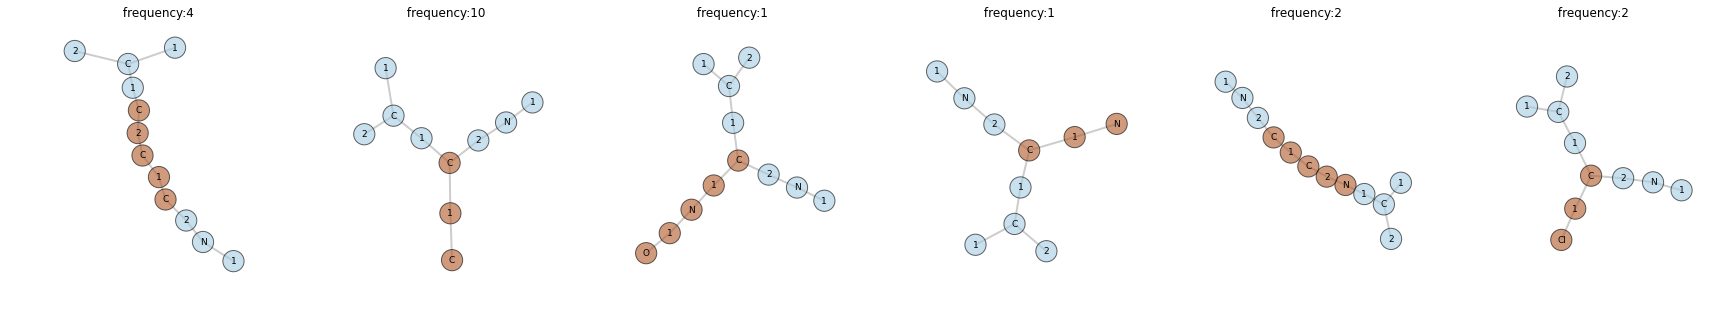

interface: 1016591


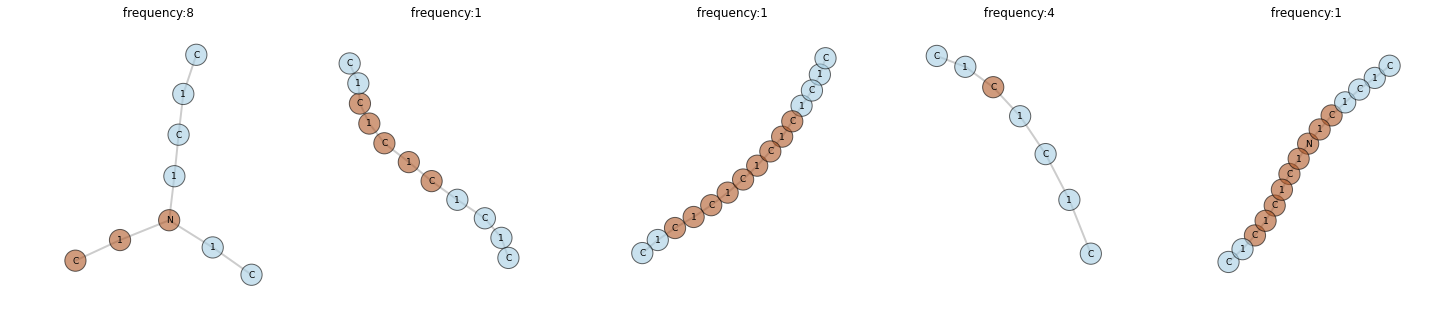

interface: 623392


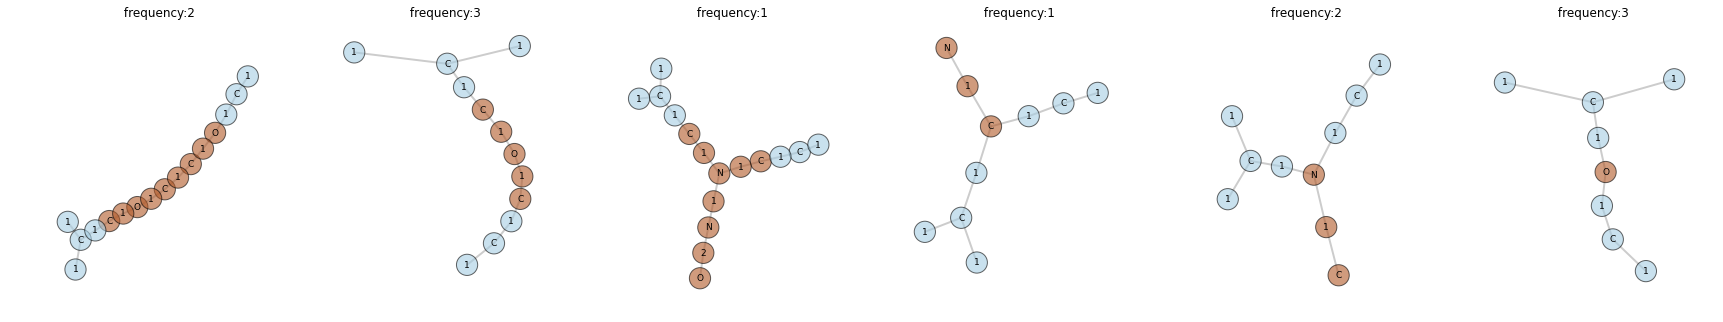

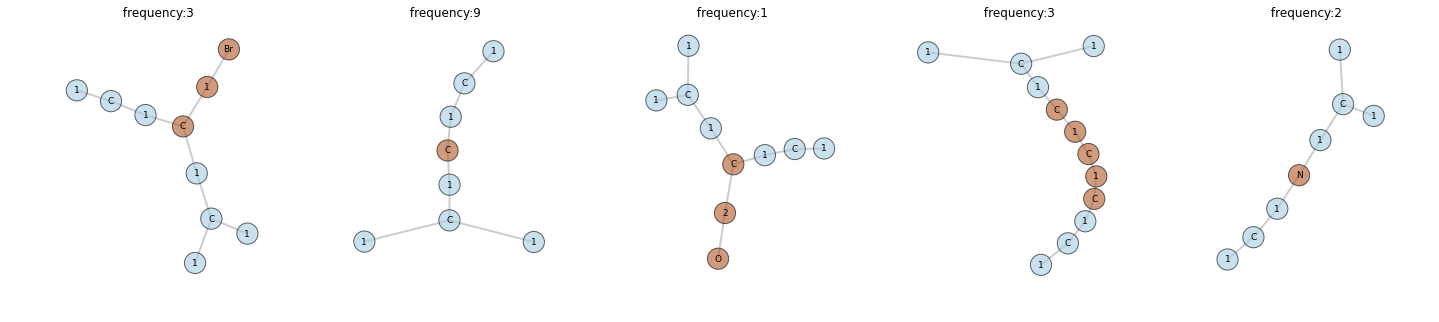

interface: 1016628


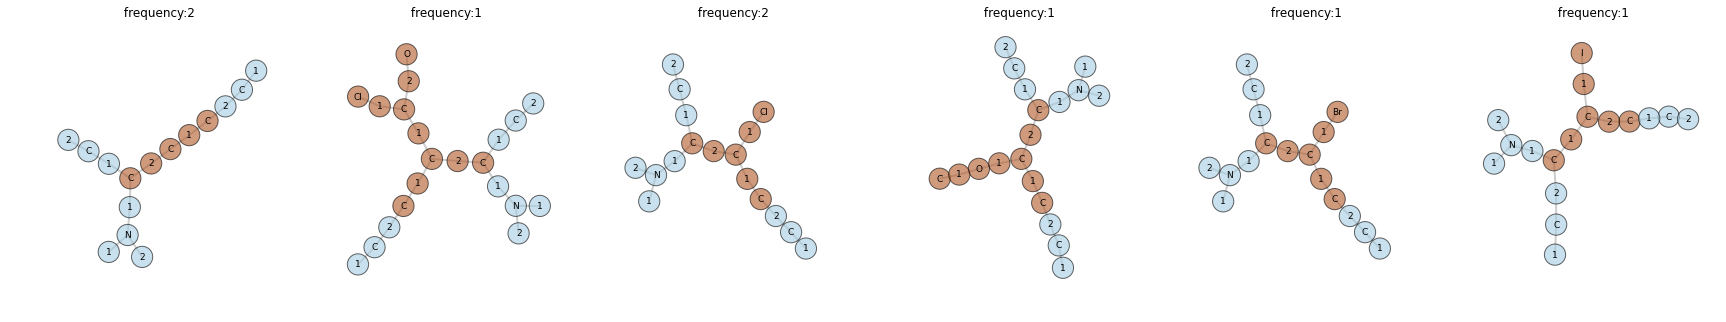

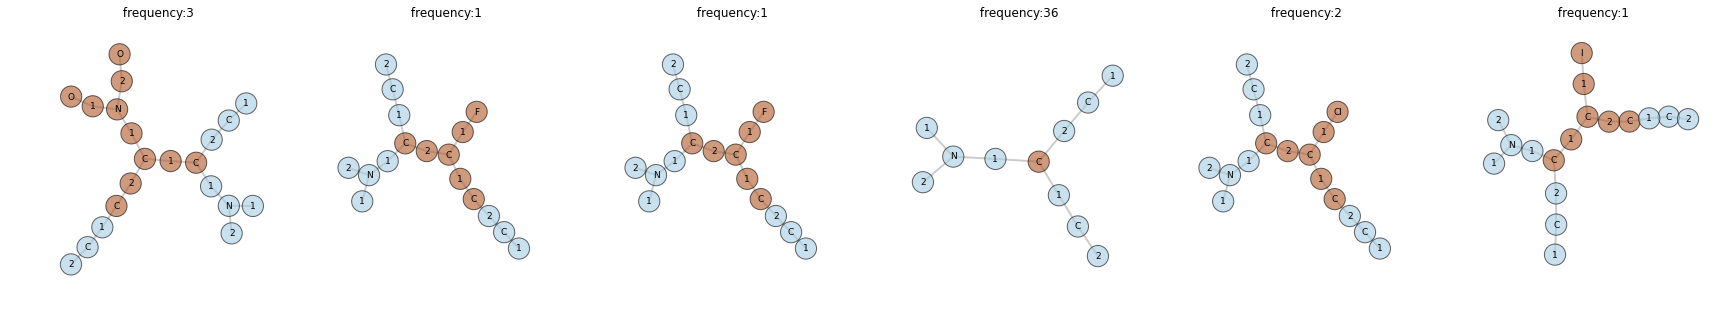

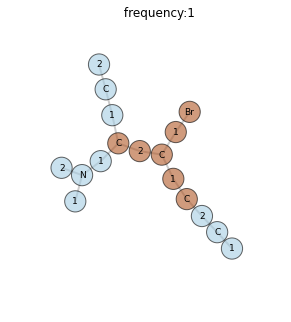

interface: 721762


interface: 983912


interface: 984002


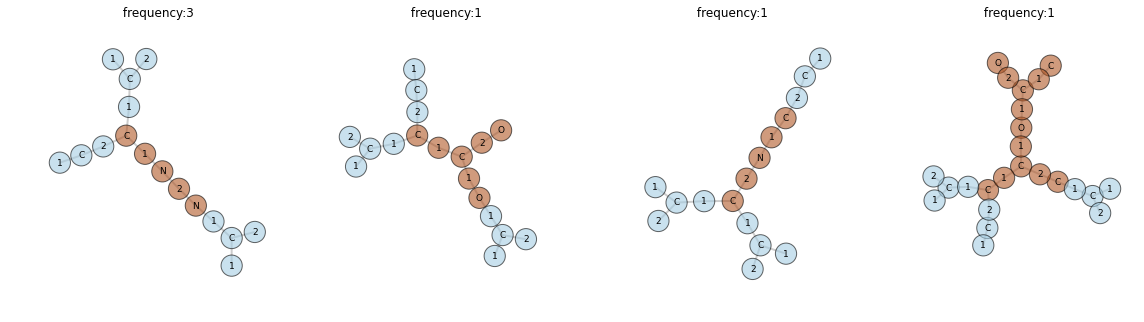

interface: 918595


interface: 722230


interface: 427410


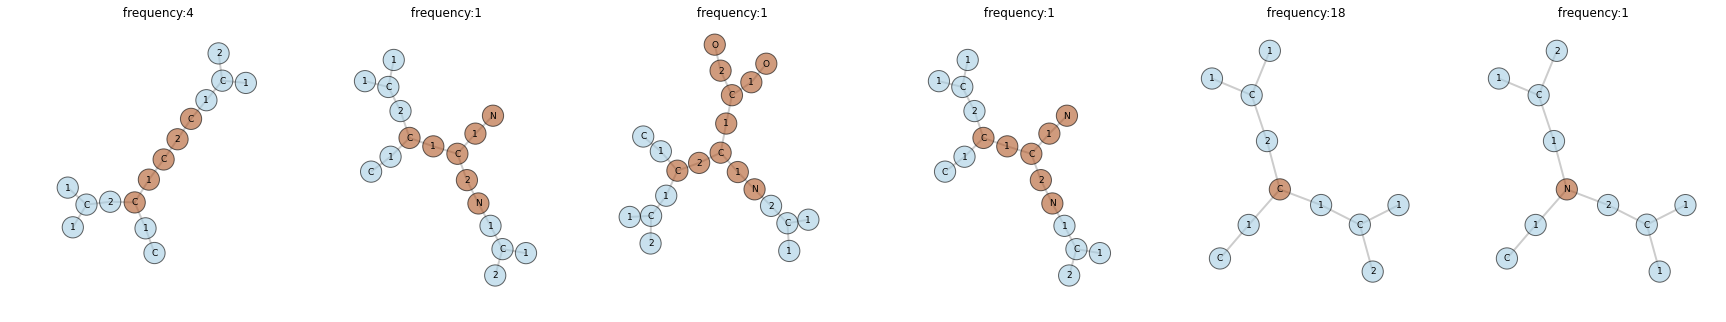

interface: 755829


interface: 35044


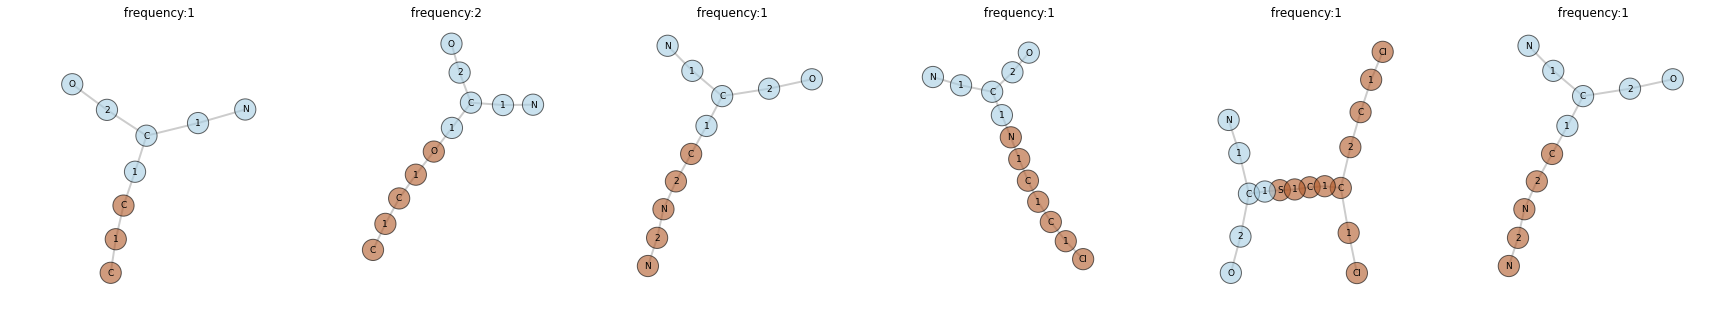

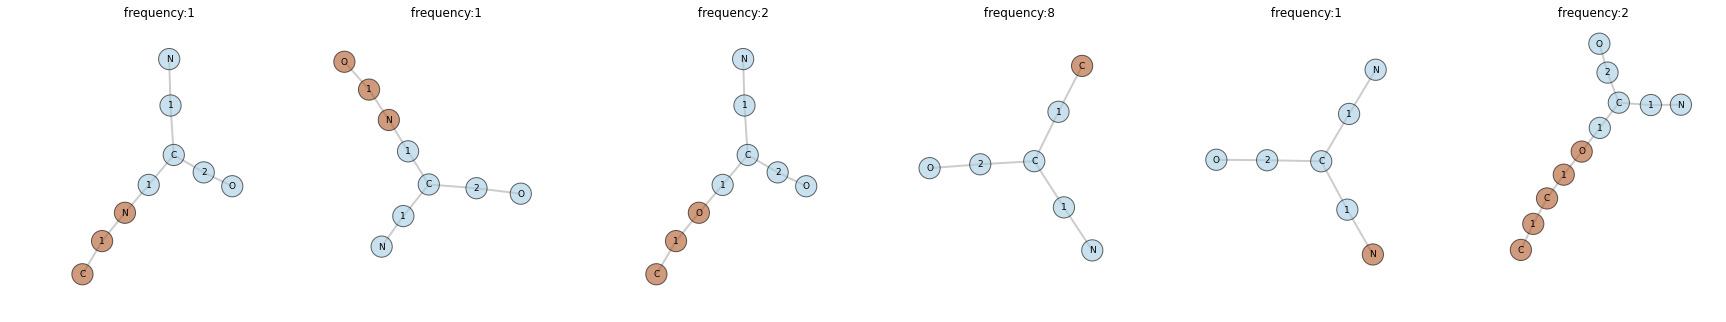

interface: 264481


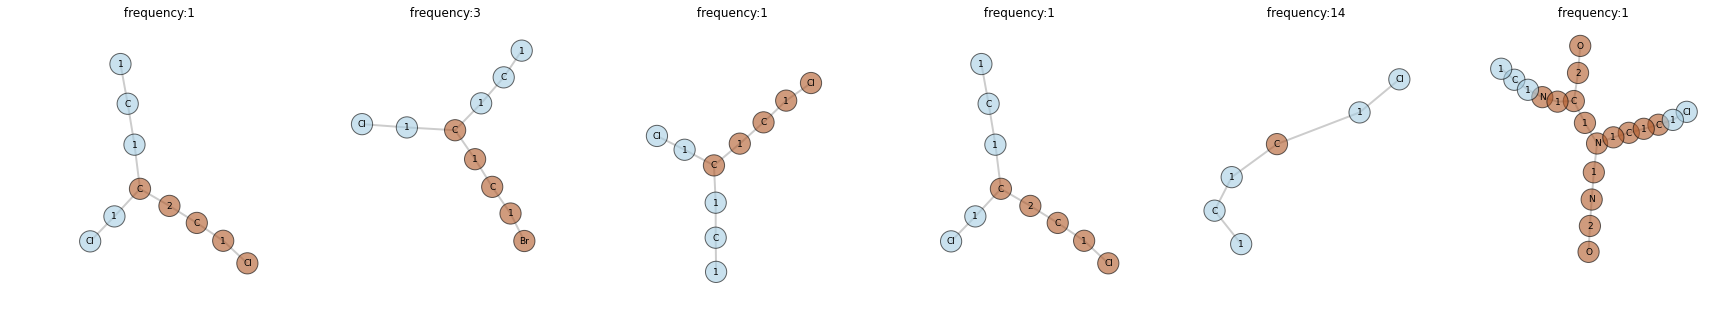

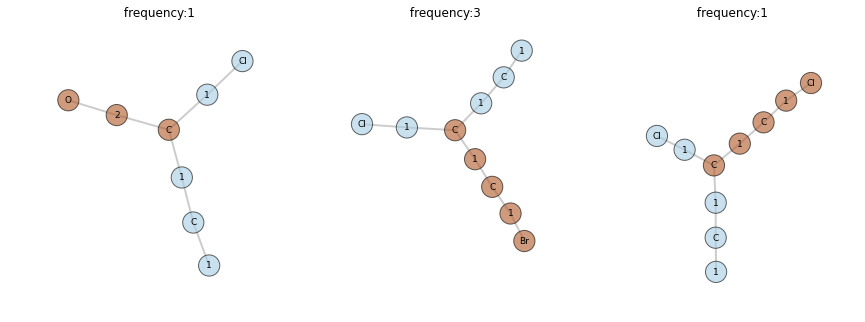

In [7]:
#draw production rules
from graphlearn.utils.draw import draw_grammar
draw_grammar(sampler.lsgg.grammar,n_productions=20,
             n_graphs_per_line=6, size=5, 
             colormap='Paired', invert_colormap=False,node_border=1,
             vertex_alpha=0.6, edge_alpha=0.2, node_size=450,contract=False)

how often do we see interfacehashes
# productions: 3002
x = # interfaces (total: 313)
y=numberofcores(ihash), y=sumOfCoreCounts(ihash)


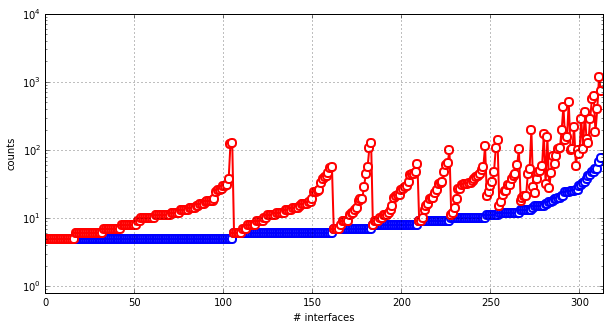

how often was this corehash seen?
x = # cores (total: 522)
y = inYinterfaces(chash), y= sumOfCountOverAllInterfaces(chash)


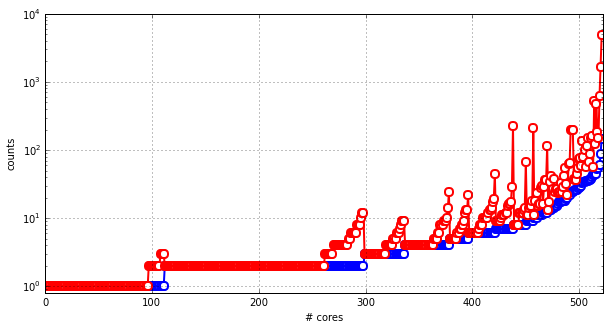

histogram
# productions: 3002
distinct cores: 522 (seen on x axis)
interfaces with x many cores were observed y many times. 


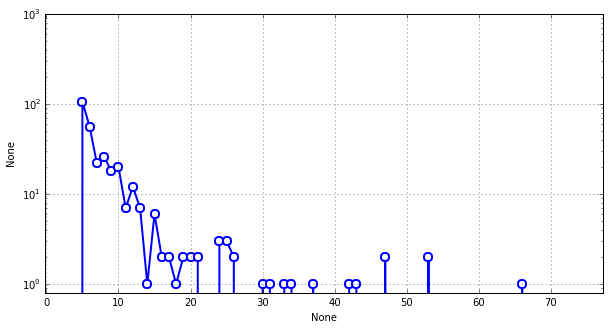

other histogram
how many cores exist with x many interfaces


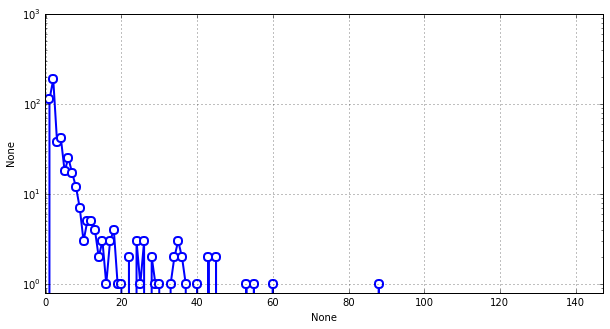

In [8]:
#grammar statistics
from graphlearn.utils.draw import draw_grammar_stats
draw_grammar_stats(sampler.lsgg.grammar, size=(10,5))

Loaded model: tmp/demo_300.ge
preprocessing grammar
_sample_notes: None
accept_annealing_factor: 1.2
accept_static_penalty: 0.0
batch_size: 1
   burnout: 1
complexity: 3
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.000883314269265, average=False, class_weight=None,
       epsilon=0.1, eta0=0.12309808443, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=81, n_jobs=1,
       penalty='l1', power_t=0.956245538802, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimator.estimator instance at 0x7faa2e8a9ea8>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7faa2e8a9e18>
generator_mode: False
hash_bitmask: 1048575
keep_duplicates: False
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7faa19750c50>
    n_jobs: 1
   n_steps: 50
      nbit: 20
node_entity_check: <fun

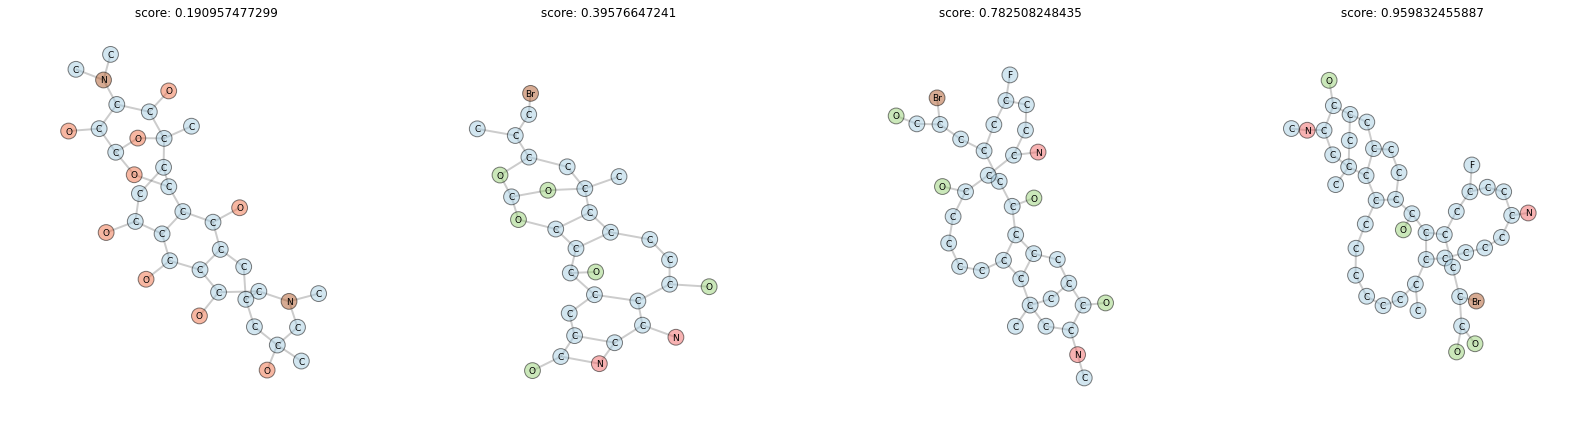

iteration:0
Working with 6 cores
iteration:1
Working with 23 cores
iteration:2
Working with 65 cores
iteration:3
Working with 32 cores
iteration:4
Working with 32 cores
iteration:5
Working with 26 cores
iteration:6
Working with 65 cores
iteration:7
Working with 52 cores
iteration:8
Working with 25 cores
iteration:9
Working with 15 cores
iteration:10
Working with 76 cores
iteration:11
Working with 46 cores
iteration:12
Working with 65 cores
iteration:13
Working with 46 cores
iteration:14
Working with 9 cores
iteration:15
Working with 23 cores
iteration:16
Working with 52 cores
iteration:17
Working with 23 cores
iteration:18
Working with 8 cores
iteration:19
Working with 8 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
ite

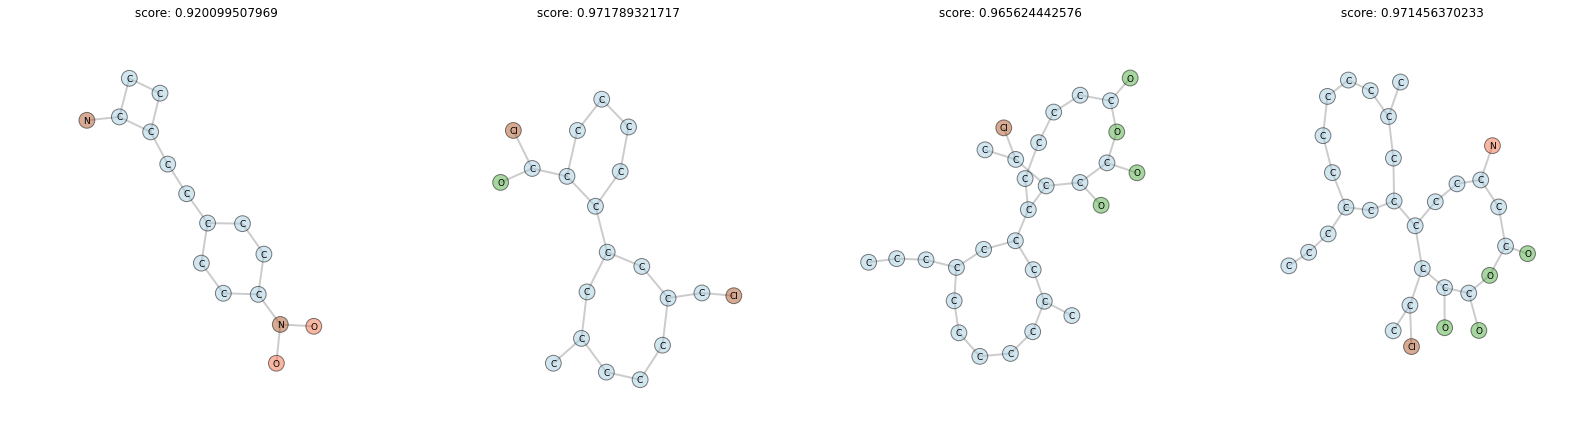

iteration:0
Working with 11 cores
iteration:1
Working with 8 cores
iteration:2
Working with 18 cores
iteration:3
Working with 5 cores
iteration:4
Working with 52 cores
iteration:5
Working with 5 cores
iteration:6
Working with 11 cores
iteration:7
Working with 19 cores
iteration:8
Working with 5 cores
iteration:9
Working with 52 cores
iteration:10
Working with 42 cores
iteration:11
Working with 10 cores
iteration:12
Working with 5 cores
iteration:13
Working with 4 cores
iteration:14
Working with 24 cores
delivering isomorphism nr.2
iteration:15
Working with 9 cores
iteration:16
Working with 9 cores
iteration:17
Working with 41 cores
iteration:18
Working with 18 cores
iteration:19
Working with 18 cores
iteration:20
Working with 5 cores
iteration:21
Working with 9 cores
iteration:22
Working with 7 cores
iteration:23
Working with 52 cores
iteration:24
Working with 6 cores
iteration:25
Working with 4 cores
iteration:26
Working with 52 cores
iteration:27
Working with 8 cores
iteration:28
Wor

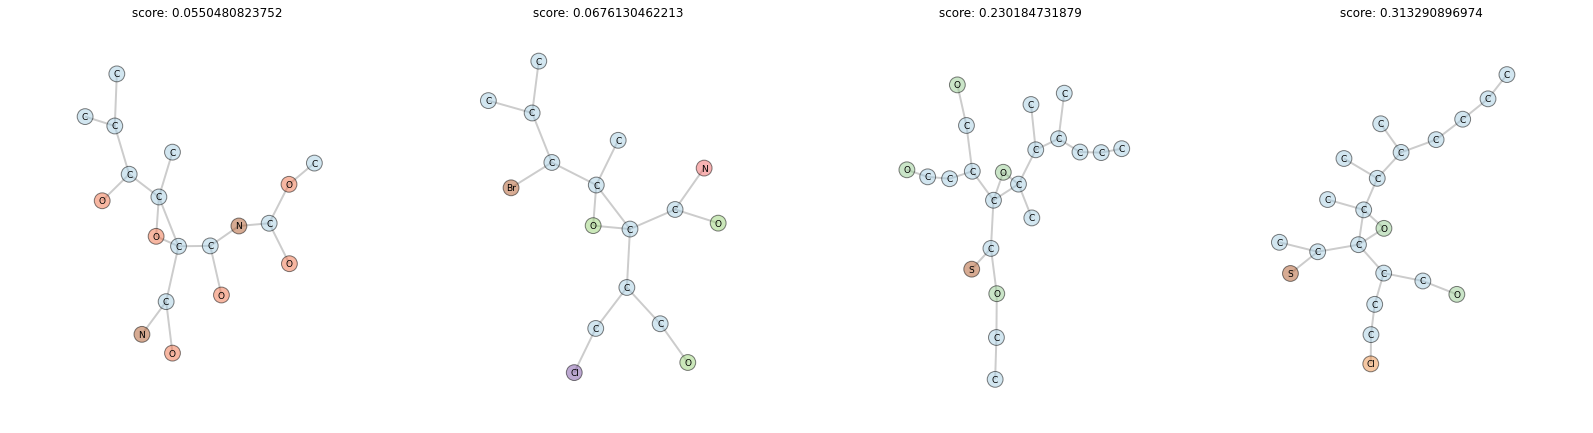

iteration:0
Working with 10 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:1
Working with 24 cores
delivering isomorphism nr.2
iteration:2
Working with 10 cores
delivering isomorphism nr.2
iteration:3
Working with 25 cores
iteration:4
Working with 8 cores
iteration:5
Working with 10 cores
iteration:6
Working with 25 cores
iteration:7
Working with 41 cores
iteration:8
Working with 5 cores
iteration:9
Working with 10 cores
iteration:10
Working with 11 cores
iteration:11
Working with 11 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:12
Working with 11 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
iteration:13
Working with 10 cores
iteration:14
Worki

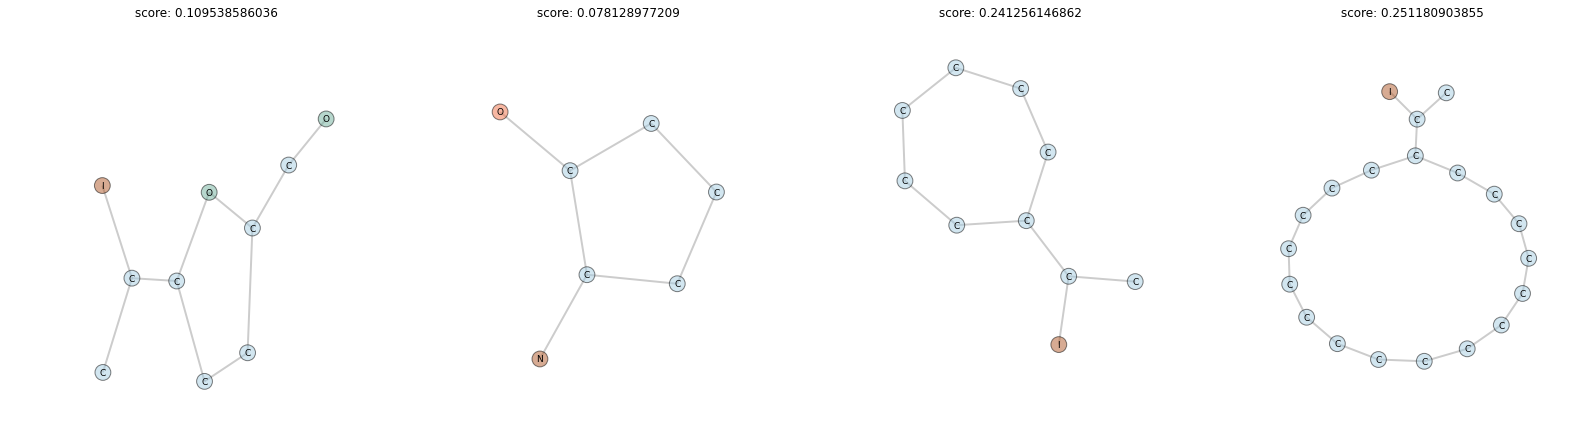

iteration:0
Working with 65 cores
iteration:1
Working with 18 cores
iteration:2
Working with 5 cores
iteration:3
Working with 18 cores
iteration:4
Working with 17 cores
iteration:5
Working with 5 cores
delivering isomorphism nr.2
iteration:6
Working with 11 cores
iteration:7
Working with 65 cores
iteration:8
Working with 25 cores
delivering isomorphism nr.2
iteration:9
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:10
Working with 11 cores
iteration:11
Working with 4 cores
iteration:12
Working with 19 cores
iteration:13
Working with 5 cores
iteration:14
Working with 33 cores
iteration:15
Working with 65 cores
iteration:16
Working with 16 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:17
Working with 46 cores
iteration:18
Working with 20 cores
iteration:19
Working with 52 cores
iteration:20
Working with 21 cores
iteration:21
Working with 5 cores
iteration:22
Working with 47 cores
iteration:23
W

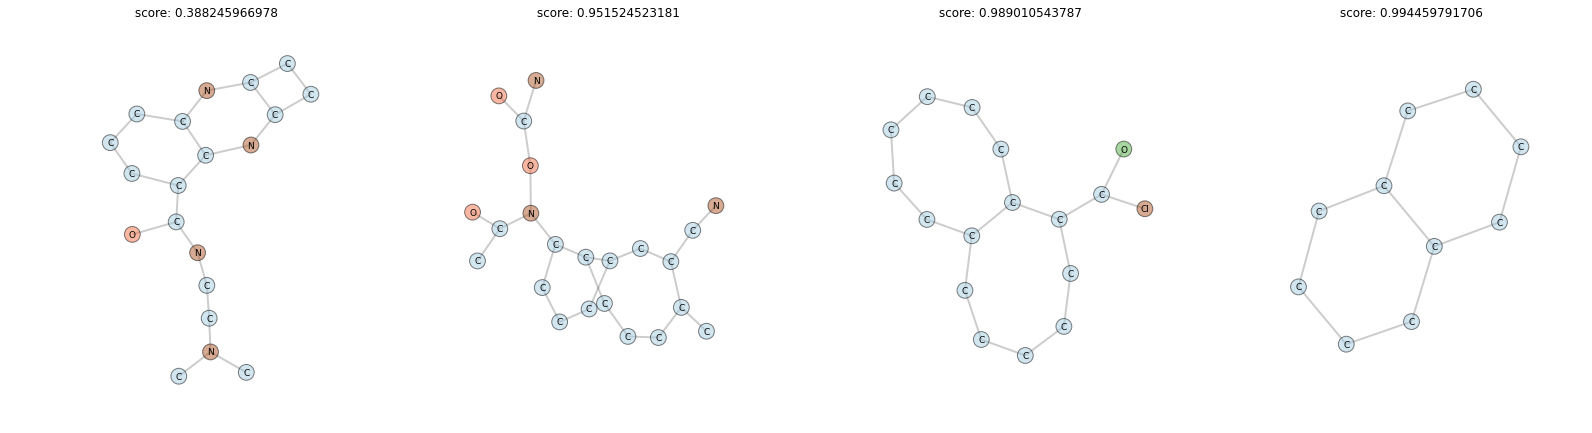

iteration:0
Working with 14 cores
iteration:1
Working with 24 cores
iteration:2
Working with 52 cores
iteration:3
Working with 11 cores
iteration:4
Working with 10 cores
iteration:5
Working with 26 cores
iteration:6
Working with 4 cores
iteration:7
Working with 46 cores
iteration:8
Working with 8 cores
iteration:9
Working with 4 cores
iteration:10
Working with 5 cores
iteration:11
Working with 9 cores
delivering isomorphism nr.2
iteration:12
Working with 9 cores
iteration:13
Working with 8 cores
iteration:14
Working with 23 cores
iteration:15
Working with 46 cores
iteration:16
Working with 13 cores
iteration:17
Working with 23 cores
iteration:18
Working with 65 cores
iteration:19
Working with 14 cores
iteration:20
Working with 8 cores
iteration:21
Working with 11 cores
delivering isomorphism nr.2
iteration:22
Working with 5 cores
iteration:23
Working with 29 cores
iteration:24
Working with 5 cores
iteration:25
Working with 23 cores
iteration:26
Working with 4 cores
iteration:27
Working

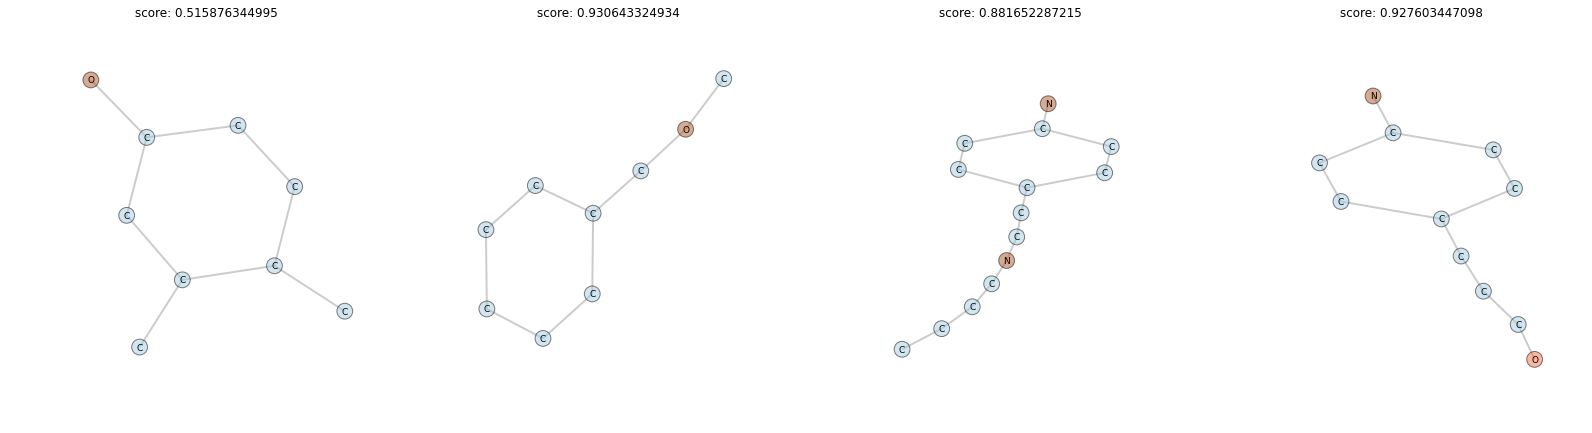

iteration:0
Working with 20 cores
delivering isomorphism nr.2
iteration:1
Working with 46 cores
iteration:2
Working with 14 cores
iteration:3
Working with 65 cores
iteration:4
Working with 65 cores
iteration:5
Working with 15 cores
delivering isomorphism nr.2
iteration:6
Working with 15 cores
iteration:7
Working with 6 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:8
Working with 76 cores
iteration:9
Working with 6 cores
iteration:10
Working with 65 cores
iteration:11
Working with 7 cores
iteration:12
Working with 7 cores
iteration:13
Working with 5 cores
iteration:14
Working with 12 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
iteration:15
Working with 5 cores
iteration:16
Working with 46 core

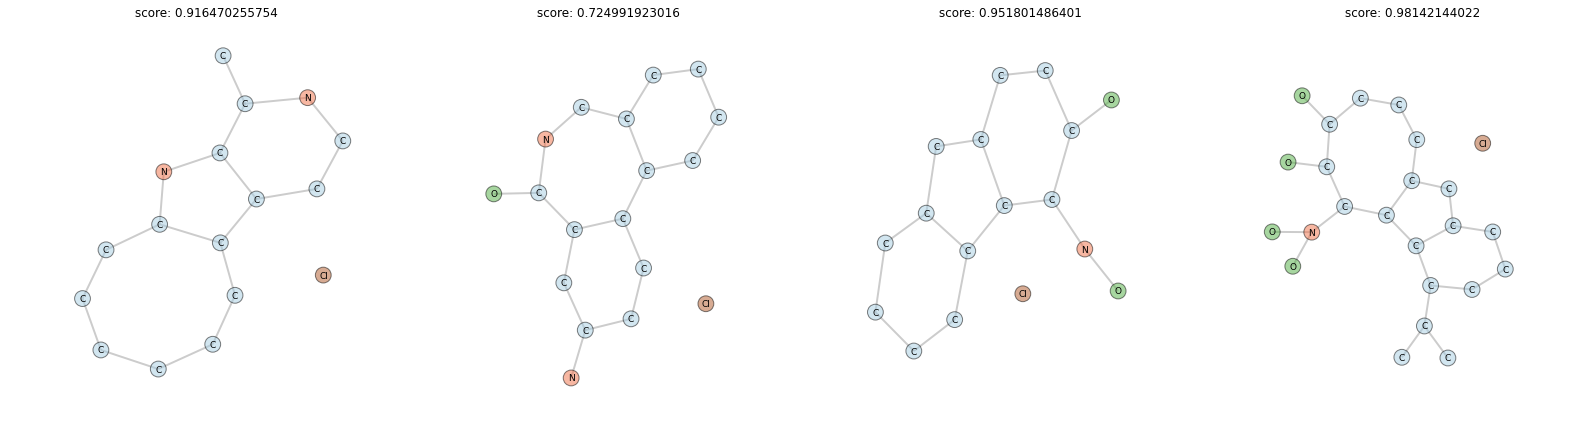

iteration:0
Working with 4 cores
iteration:1
Working with 24 cores
iteration:2
Working with 7 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:3
Working with 5 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
delivering isomorphism nr.13
delivering isomorphism nr.14
iteration:4
Working with 4 cores
delivering isomorphism nr.2
iteration:5
Working with 18 cores
iteration:6
Working with 18 cores
iteration:7
Working with 19 cores
delivering isomorphism nr.2
iteration:8
Working with 19 cores
iteration:9
Working with 4 cores
iteration:10
Working with 42 cores
iteration:11
Working with 42 cores
iteration:12
Working with 10 cores
iteration:13
Working with 6 cores
iteration:14
Working with 4 cores
iteration:1

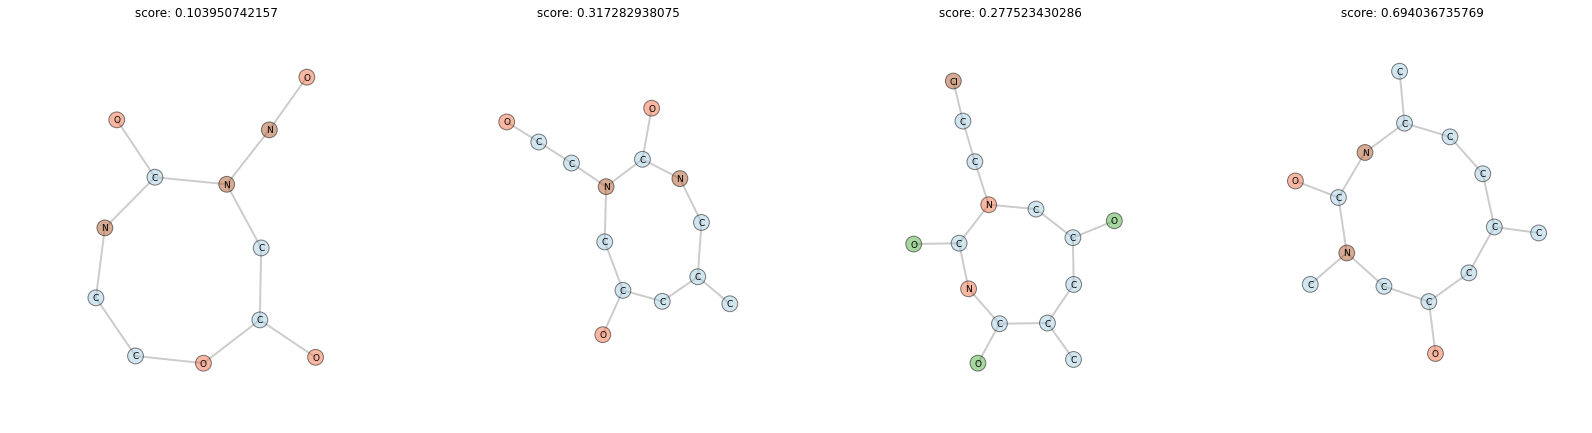

iteration:0
Working with 12 cores
delivering isomorphism nr.2
iteration:1
Working with 23 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:2
Working with 46 cores
iteration:3
Working with 12 cores
iteration:4
Working with 52 cores
iteration:5
Working with 5 cores
iteration:6
Working with 52 cores
iteration:7
Working with 9 cores
iteration:8
Working with 76 cores
iteration:9
Working with 24 cores
iteration:10
Working with 19 cores
delivering isomorphism nr.2
iteration:11
Working with 76 cores
iteration:12
Working with 76 cores
iteration:13
Working with 46 cores
iteration:14
Working with 9 cores
iteration:15
Working with 46 cores
iteration:16
Working with 11 cores
iteration:17
Working with 77 cores
iteration:18
Working with 10 cores
iteration:19
Working with 5 cores
iteration:20
Working with 9 cores
iteration:21
Working with 30 cores
iteration:22
Working with 20 cores
delivering iso

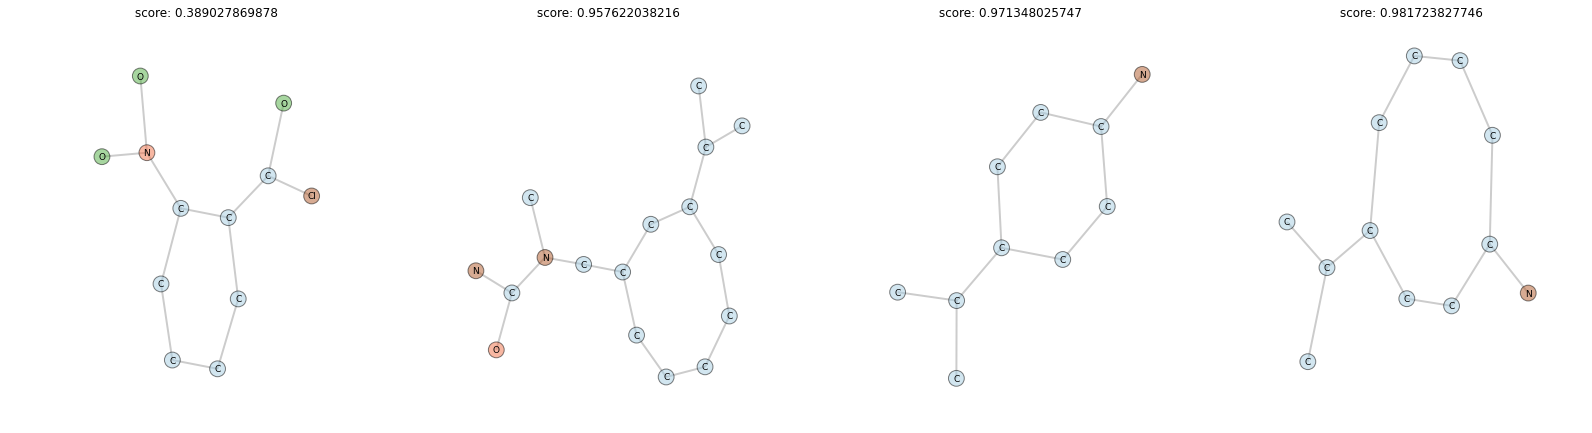

iteration:0
Working with 8 cores
iteration:1
Working with 41 cores
iteration:2
Working with 9 cores
iteration:3
Working with 52 cores
iteration:4
Working with 5 cores
iteration:5
Working with 8 cores
iteration:6
Working with 8 cores
iteration:7
Working with 8 cores
iteration:8
Working with 4 cores
iteration:9
Working with 52 cores
iteration:10
Working with 5 cores
iteration:11
Working with 6 cores
iteration:12
Working with 4 cores
iteration:13
Working with 8 cores
iteration:14
Working with 41 cores
iteration:15
Working with 4 cores
iteration:16
Working with 5 cores
iteration:17
Working with 5 cores
iteration:18
Working with 52 cores
iteration:19
Working with 53 cores
iteration:20
Working with 6 cores
iteration:21
Working with 5 cores
iteration:22
Working with 6 cores
iteration:23
Working with 5 cores
iteration:24
Working with 24 cores
delivering isomorphism nr.2
iteration:25
Working with 5 cores
iteration:26
Working with 53 cores
iteration:27
Working with 24 cores
iteration:28
Working 

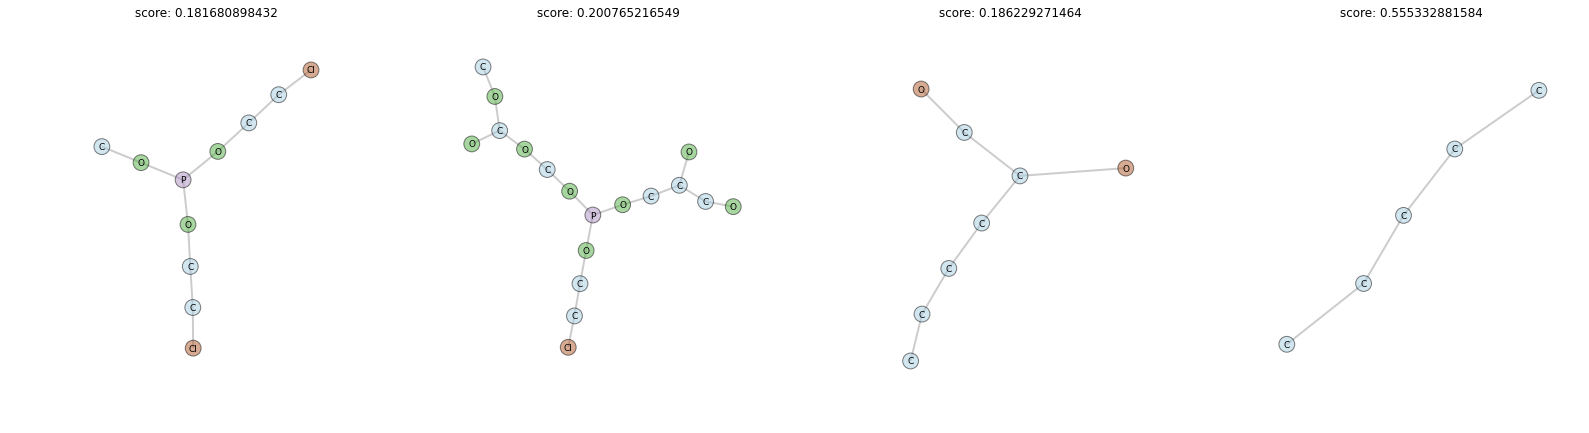

iteration:0
Working with 65 cores
iteration:1
Working with 5 cores
delivering isomorphism nr.2
iteration:2
Working with 6 cores
iteration:3
Working with 4 cores
iteration:4
Working with 21 cores
iteration:5
Working with 76 cores
iteration:6
Working with 66 cores
iteration:7
Working with 21 cores
iteration:8
Working with 46 cores
iteration:9
Working with 6 cores
delivering isomorphism nr.2
iteration:10
Working with 21 cores
iteration:11
Working with 5 cores
iteration:12
Working with 76 cores
iteration:13
Working with 65 cores
iteration:14
Working with 76 cores
iteration:15
Working with 6 cores
iteration:16
Working with 20 cores
iteration:17
Working with 16 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:18
Working with 33 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:19
Working with 77 cores
iteration:20
Working with 65 cores
iteration:21
Working with 9 cores
iteration:22
Working with 5 cores
iteration:23
Work

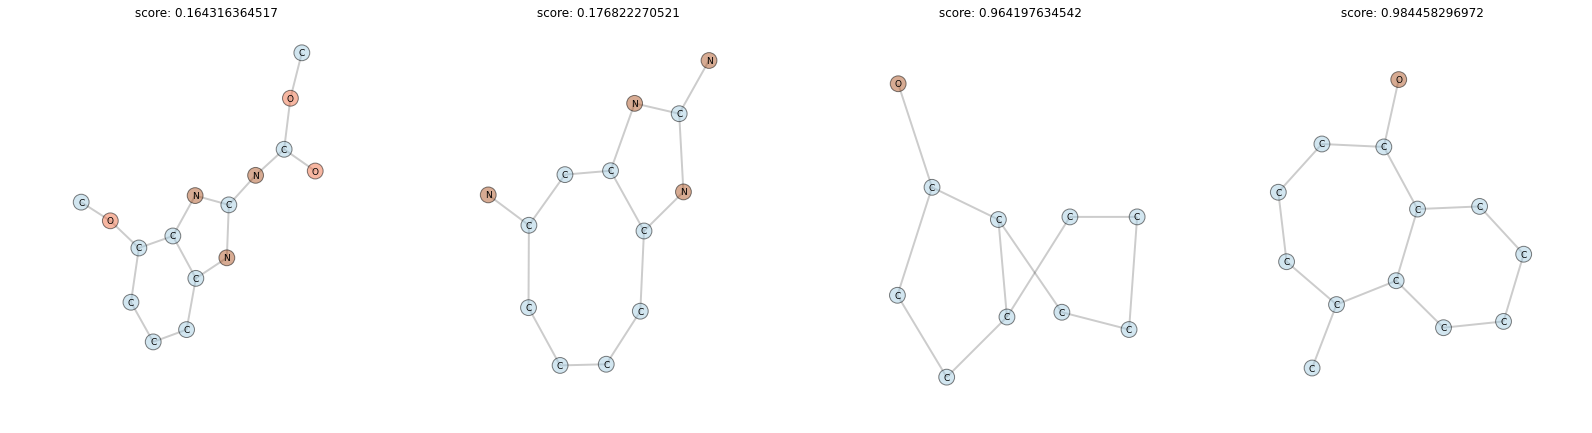

iteration:0
Working with 24 cores
delivering isomorphism nr.2
iteration:1
Working with 4 cores
iteration:2
Working with 14 cores
iteration:3
Working with 5 cores
iteration:4
Working with 25 cores
iteration:5
Working with 15 cores
iteration:6
Working with 23 cores
iteration:7
Working with 4 cores
iteration:8
Working with 12 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:9
Working with 5 cores
iteration:10
Working with 29 cores
iteration:11
Working with 76 cores
iteration:12
Working with 6 cores
iteration:13
Working with 9 cores
iteration:14
Working with 5 cores
iteration:15
Working with 65 cores
iteration:16
Working with 11 cores
iteration:17
Working with 47 cores
iteration:18
Working with 11 cores
iteration:19
Working with 11 cores
iteration:20
Working with 17 cores
iteration:21
Working with 46 cores
iteration:22
Working with 7 cores
iteration:23
Working with 10 cores
iteration:24
Working with 32 cores
iteration:25
Working with 76 cores
iteration:26
Working wit

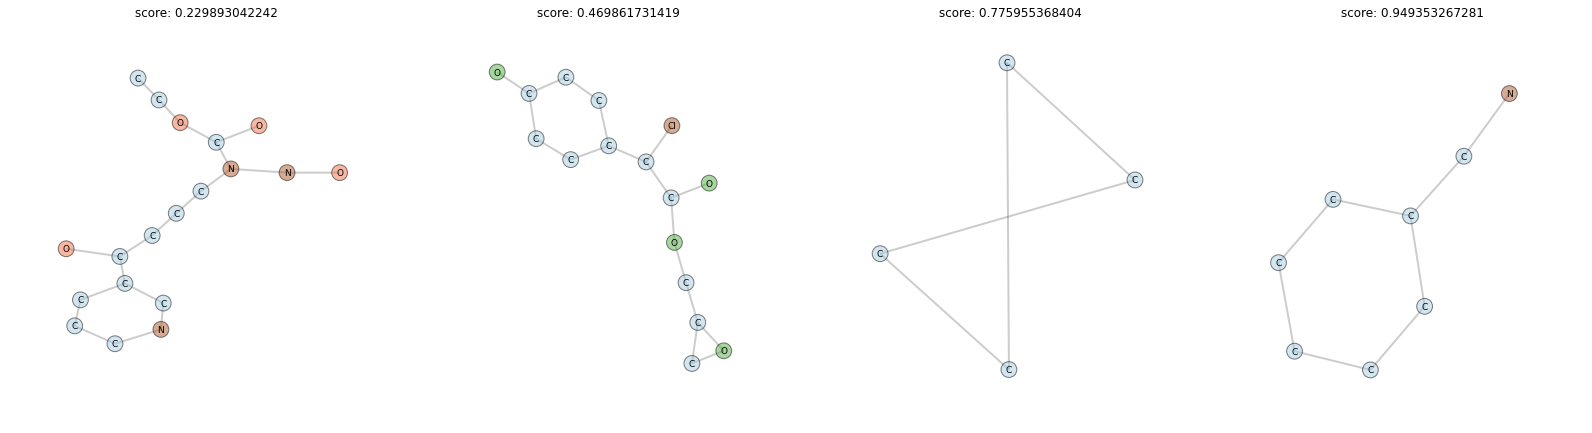

iteration:0
Working with 36 cores
iteration:1
Working with 36 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:2
Working with 36 cores
iteration:3
Working with 25 cores
iteration:4
Working with 36 cores
iteration:5
Working with 37 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:6
Working with 37 cores
iteration:7
Working with 36 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:8
Working with 36 cores
iteration:9
Working with 37 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:10
Working with 36 cores
delivering isomorphism nr.2
iteration:11
Working with 36 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:12
Working with 36 cores
iteration:13
Working with 36 cores
delivering isomorphism nr.2
iteration:14
Working with 36 cores
iteration:15
Working with 25 cores
iteration:16
Working with 36 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:17
Working wi

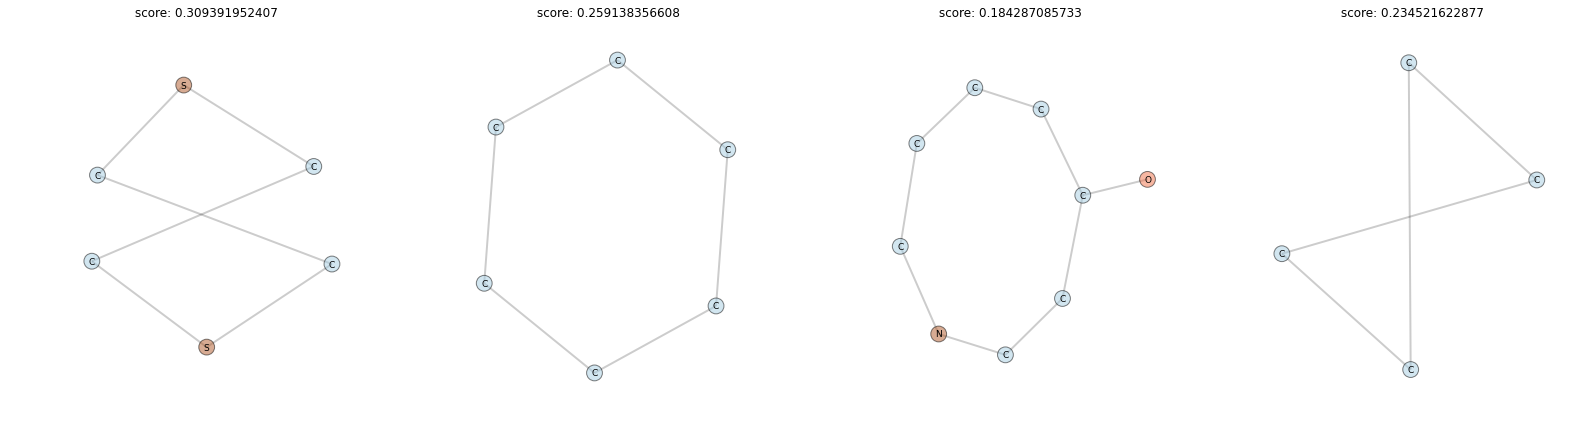

iteration:0
Working with 25 cores
iteration:1
Working with 76 cores
iteration:2
Working with 76 cores
iteration:3
Working with 76 cores
iteration:4
Working with 15 cores
iteration:5
Working with 23 cores
iteration:6
Working with 5 cores
iteration:7
Working with 33 cores
iteration:8
Working with 65 cores
iteration:9
Working with 65 cores
iteration:10
Working with 33 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
iteration:11
Working with 30 cores
iteration:12
Working with 10 cores
iteration:13
Working with 9 cores
iteration:14
Working with 26 cores
iteration:15
Working with 30 cores
iteration:16
Working with 76 cores
iteration:17
Working with 8 cores
iteration:18
Working with 9 cores
iteration:19
Working with 76 cores
iteration:20
Working with 30 cores
iteration:21
Working with 9 cores
iteration:22
Working with 29 cores
iteration:23
Working with 33 cores
iteration:24
Working with 16 cores
iteration:25
Working with 46

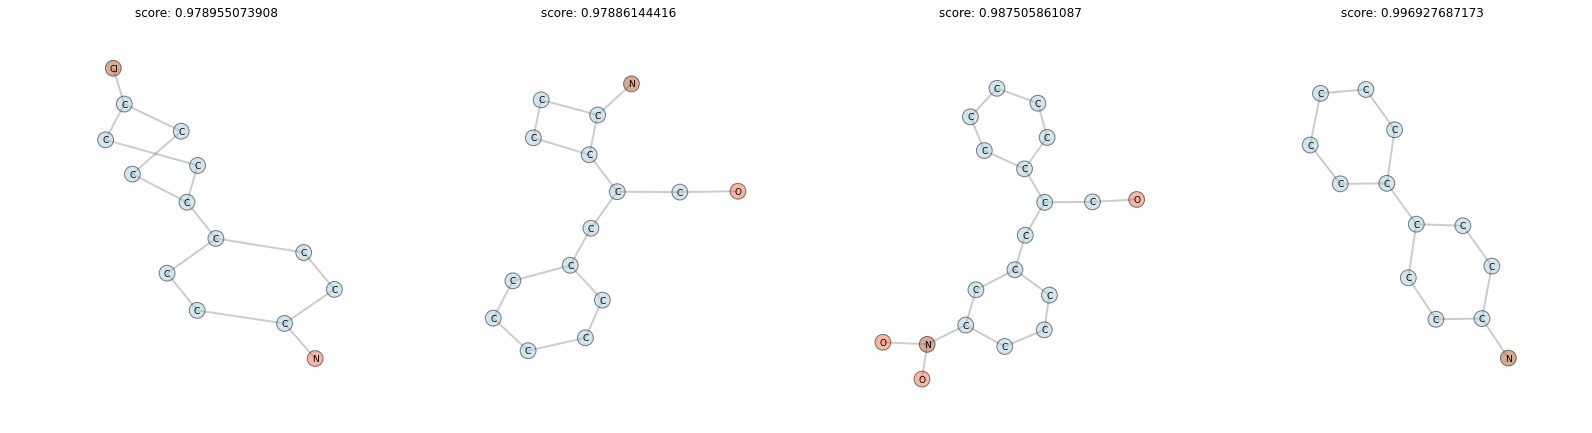

iteration:0
Working with 65 cores
iteration:1
Working with 52 cores
iteration:2
Working with 8 cores
iteration:3
Working with 6 cores
iteration:4
Working with 9 cores
iteration:5
Working with 11 cores
iteration:6
Working with 4 cores
iteration:7
Working with 65 cores
iteration:8
Working with 52 cores
iteration:9
Working with 76 cores
iteration:10
Working with 20 cores
iteration:11
Working with 25 cores
iteration:12
Working with 46 cores
iteration:13
Working with 5 cores
iteration:14
Working with 65 cores
iteration:15
Working with 9 cores
iteration:16
Working with 10 cores
iteration:17
Working with 6 cores
iteration:18
Working with 33 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
iteration:19
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:20
Working with 14 cores
iteration:21
Working with 76 c

iteration:0
Working with 65 cores
iteration:1
Working with 4 cores
iteration:2
Working with 21 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:3
Working with 4 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
delivering isomorphism nr.13
delivering isomorphism nr.14
delivering isomorphism nr.15
delivering isomorphism nr.16
delivering isomorphism nr.17
delivering isomorphism nr.18
delivering isomorphism nr.19
delivering isomorphism nr.20
delivering isomorphism nr.21
delivering isomorphism nr.22
delivering isomorphism nr.23
delivering isomorphism nr.24
delivering isomorphism nr.25
delivering isomorphism nr.26
delivering isomorphism nr.27
delivering isomorphism nr.28
deliver

iteration:0
Working with 11 cores
iteration:1
Working with 10 cores
iteration:2
Working with 9 cores
iteration:3
Working with 10 cores
iteration:4
Working with 9 cores
iteration:5
Working with 5 cores
iteration:6
Working with 52 cores
iteration:7
Working with 33 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
iteration:8
Working with 9 cores
iteration:9
Working with 9 cores
iteration:10
Working with 52 cores
iteration:11
Working with 76 cores
iteration:12
Working with 5 cores
delivering isomorphism nr.2
iteration:13
Working with 4 cores
iteration:14
Working with 4 cores
iteration:15
Working with 7 cores
iteration:16
Working with 76 cores
iteration:17
Working with 42 cores
iteration:18
Working with 30 cores
iteration:19
Working with 52 cores
iteration:20
Working with 53 cores
iteration:21
Working with 47 cores
iteration:22
Working with 46 cores
iteration:23
Working with 30 cores
iteration:24
Working with 42 cores
iter

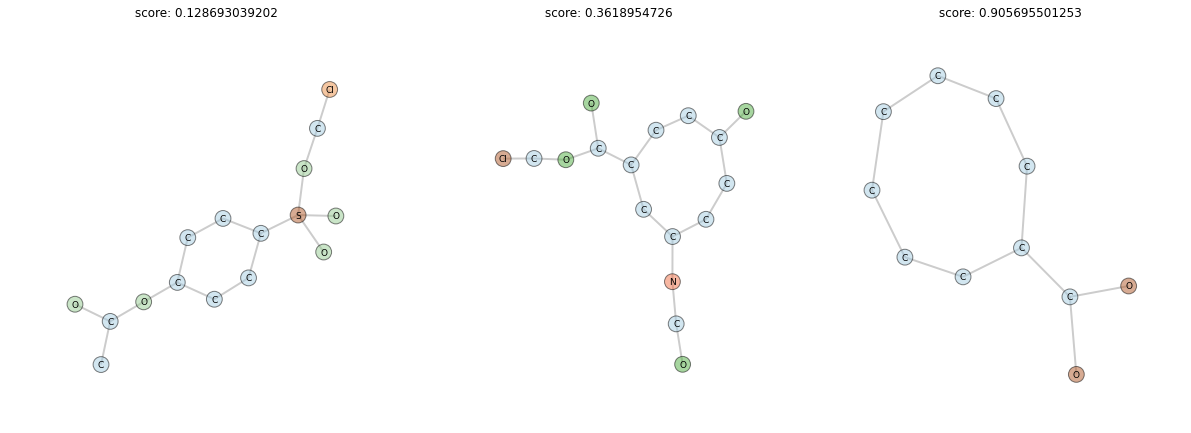

iteration:0
Working with 8 cores
iteration:1
Working with 5 cores
iteration:2
Working with 52 cores
iteration:3
Working with 8 cores
iteration:4
Working with 76 cores
iteration:5
Working with 8 cores
iteration:6
Working with 9 cores
iteration:7
Working with 12 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
iteration:8
Working with 8 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:9
Working with 30 cores
iteration:10
Working with 5 cores
iteration:11
Working with 30 cores
delivering isomorphism nr.2
iteration:12
Working with 76 cores
iteration:13
Working with 65 cores
iteration:14
Working with 12 cores
delivering isomorphism nr.2
iteration:15
Working with 23 cores
iteration:16
Working with 8 cores
iteration:17
Working with 5 cores
iteration:18
Working with 77 cores
iteration:19
Working with 46 cores
iteration:20
Working with 46 cores
iteration:21
Working with 24 cor

iteration:0
Working with 4 cores
iteration:1
Working with 76 cores
iteration:2
Working with 32 cores
iteration:3
Working with 30 cores
iteration:4
Working with 9 cores
iteration:5
Working with 4 cores
iteration:6
Working with 23 cores
iteration:7
Working with 6 cores
iteration:8
Working with 46 cores
iteration:9
Working with 46 cores
iteration:10
Working with 52 cores
iteration:11
Working with 11 cores
iteration:12
Working with 65 cores
iteration:13
Working with 13 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:14
Working with 46 cores
iteration:15
Working with 42 cores
iteration:16
Working with 9 cores
delivering isomorphism nr.2
iteration:17
Working with 16 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:18
Working with 12 cores
delivering isomorphism nr.2
iteration:19
Working with 11 cores
iteration:20
Working with 9 cores
iteration:21
Working with 30 cores
delivering isomorphism nr.2
iteration:22
Working with 46 cores
iteration:23
Wo

iteration:0
Working with 4 cores
iteration:1
Working with 76 cores
iteration:2
Working with 52 cores
iteration:3
Working with 24 cores
iteration:4
Working with 76 cores
iteration:5
Working with 46 cores
iteration:6
Working with 6 cores
iteration:7
Working with 47 cores
iteration:8
Working with 46 cores
iteration:9
Working with 76 cores
iteration:10
Working with 46 cores
iteration:11
Working with 33 cores
iteration:12
Working with 7 cores
iteration:13
Working with 32 cores
iteration:14
Working with 46 cores
iteration:15
Working with 10 cores
iteration:16
Working with 76 cores
iteration:17
Working with 76 cores
iteration:18
Working with 65 cores
iteration:19
Working with 29 cores
iteration:20
Working with 76 cores
iteration:21
Working with 76 cores
iteration:22
Working with 4 cores
iteration:23
Working with 52 cores
iteration:24
Working with 9 cores
delivering isomorphism nr.2
iteration:25
Working with 46 cores
iteration:26
Working with 46 cores
iteration:27
Working with 76 cores
iterati

iteration:0
Working with 14 cores
iteration:1
Working with 10 cores
iteration:2
Working with 65 cores
iteration:3
Working with 46 cores
iteration:4
Working with 7 cores
iteration:5
Working with 12 cores
iteration:6
Working with 65 cores
iteration:7
Working with 24 cores
iteration:8
Working with 23 cores
iteration:9
Working with 42 cores
iteration:10
Working with 18 cores
iteration:11
Working with 65 cores
iteration:12
Working with 65 cores
iteration:13
Working with 65 cores
iteration:14
Working with 76 cores
iteration:15
Working with 65 cores
iteration:16
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:17
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:18
Working with 65 cores
iteration:19
Working with 23 cores
iteration:20
Working with 23 cores
iteration:21
Working with 46 cores
iteration:22
Work

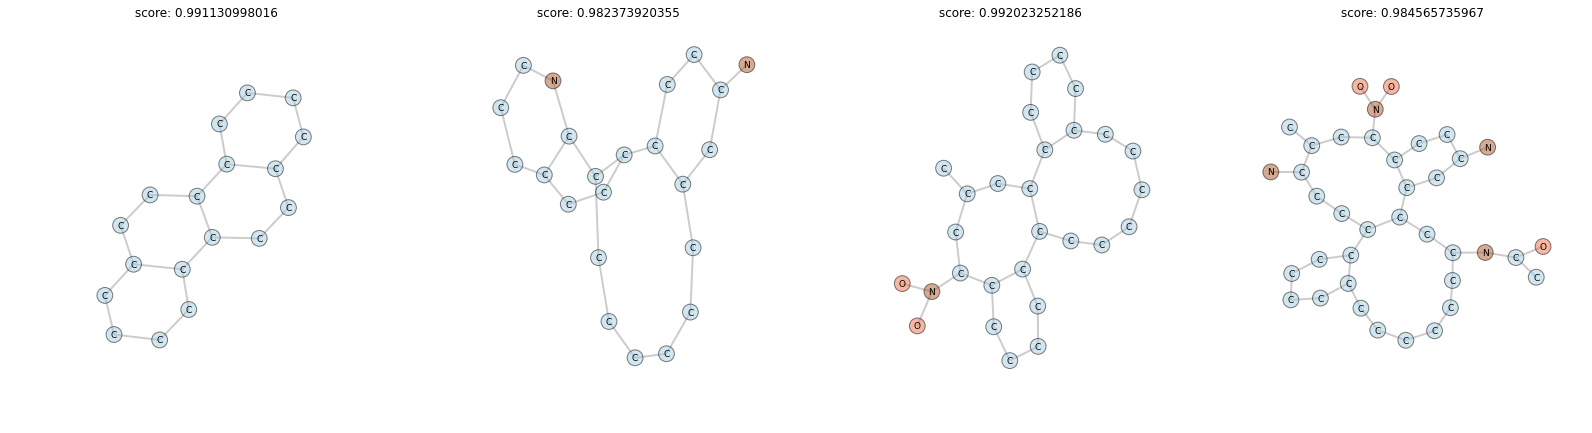

iteration:0
Working with 23 cores
iteration:1
Working with 15 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:2
Working with 12 cores
iteration:3
Working with 9 cores
iteration:4
Working with 14 cores
iteration:5
Working with 5 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:6
Working with 5 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:7
Working with 5 cores
iteration:8
Working with 65 cores
iteration:9
Working with 23 cores
iteration:10
Working with 24 cores
iteration:11
Working with 23 cores
iteration:12
Working with 23 cores
iteration:13
Working with 12 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorp

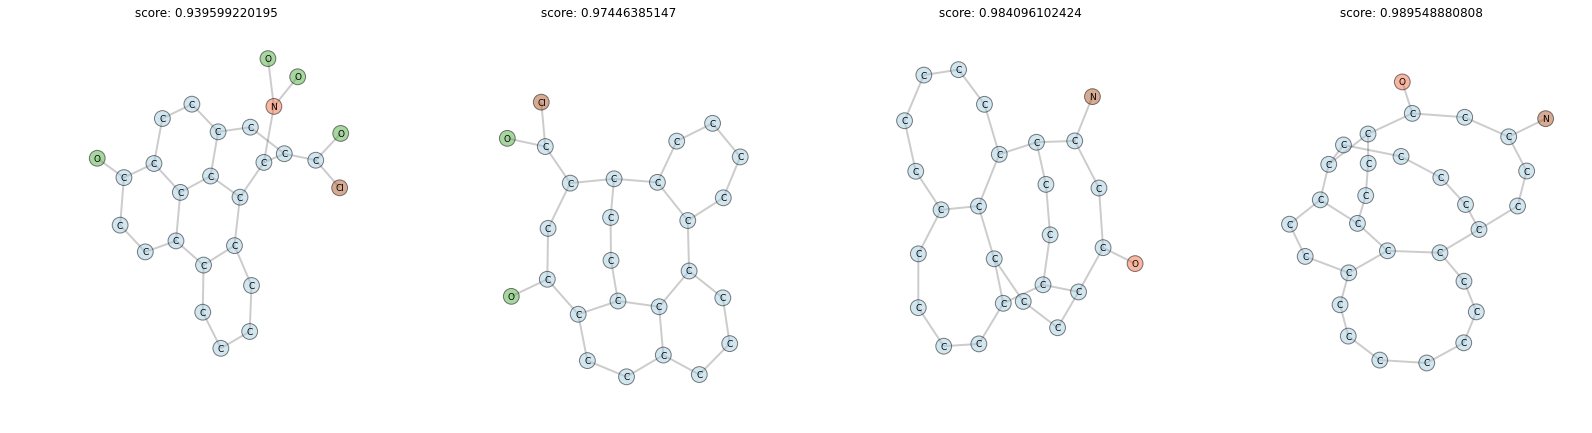

iteration:0
Working with 9 cores
iteration:1
Working with 65 cores
iteration:2
Working with 23 cores
iteration:3
Working with 5 cores
iteration:4
Working with 23 cores
iteration:5
Working with 30 cores
iteration:6
Working with 4 cores
iteration:7
Working with 9 cores
iteration:8
Working with 7 cores
iteration:9
Working with 46 cores
iteration:10
Working with 46 cores
iteration:11
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:12
Working with 7 cores
iteration:13
Working with 65 cores
iteration:14
Working with 8 cores
iteration:15
Working with 7 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
delivering isomorphism nr.13
delivering isomorphism nr.14
deliv

iteration:0
Working with 9 cores
iteration:1
Working with 65 cores
iteration:2
Working with 10 cores
iteration:3
Working with 10 cores
iteration:4
Working with 8 cores
iteration:5
Working with 9 cores
iteration:6
Working with 33 cores
delivering isomorphism nr.2
iteration:7
Working with 8 cores
iteration:8
Working with 65 cores
iteration:9
Working with 9 cores
iteration:10
Working with 46 cores
iteration:11
Working with 46 cores
iteration:12
Working with 65 cores
iteration:13
Working with 8 cores
iteration:14
Working with 8 cores
iteration:15
Working with 65 cores
iteration:16
Working with 23 cores
iteration:17
Working with 9 cores
iteration:18
Working with 46 cores
iteration:19
Working with 23 cores
iteration:20
Working with 24 cores
iteration:21
Working with 4 cores
iteration:22
Working with 42 cores
iteration:23
Working with 65 cores
iteration:24
Working with 24 cores
iteration:25
Working with 43 cores
iteration:26
Working with 77 cores
iteration:27
Working with 76 cores
iteration:2

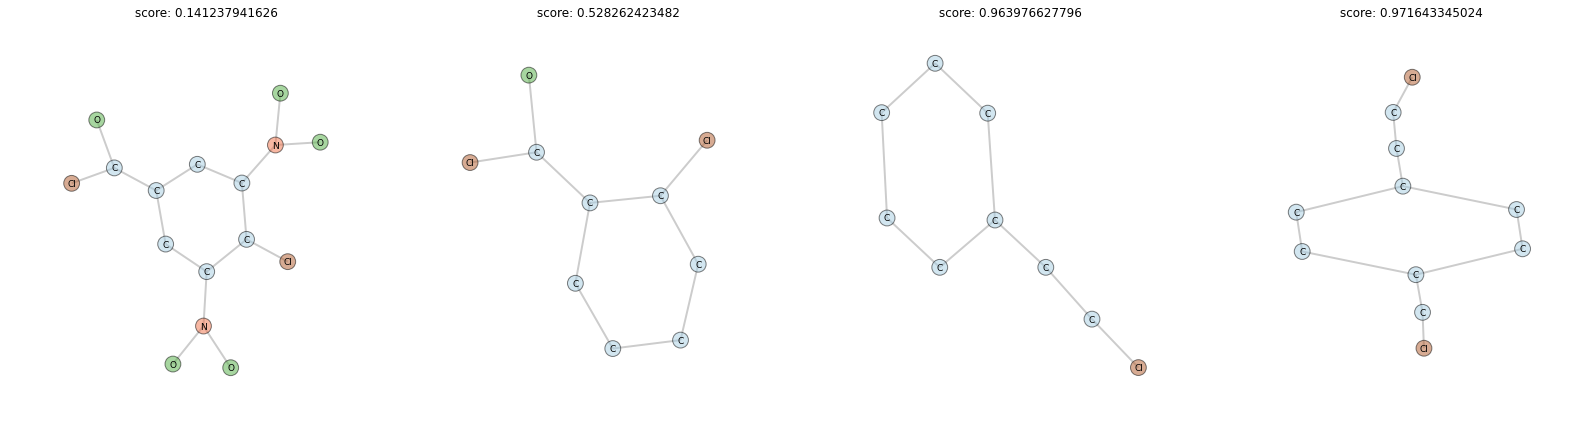

iteration:0
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:1
Working with 23 cores
iteration:2
Working with 20 cores
iteration:3
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
iteration:4
Working with 65 cores
iteration:5
Working with 4 cores
iteration:6
Working with 21 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:7
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:8
Working with 23 cores
iteration:9
Working with 20 cores
delivering isomorphism nr.2
iteration:10
Working with 76 cores
iteration:11
Working with 5 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
deli

iteration:0
Working with 20 cores
delivering isomorphism nr.2
iteration:1
Working with 4 cores
iteration:2
Working with 12 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
delivering isomorphism nr.13
delivering isomorphism nr.14
delivering isomorphism nr.15
delivering isomorphism nr.16
delivering isomorphism nr.17
iteration:3
Working with 12 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
delivering isomorphism nr.13
delivering isomorphism nr.14
delivering i

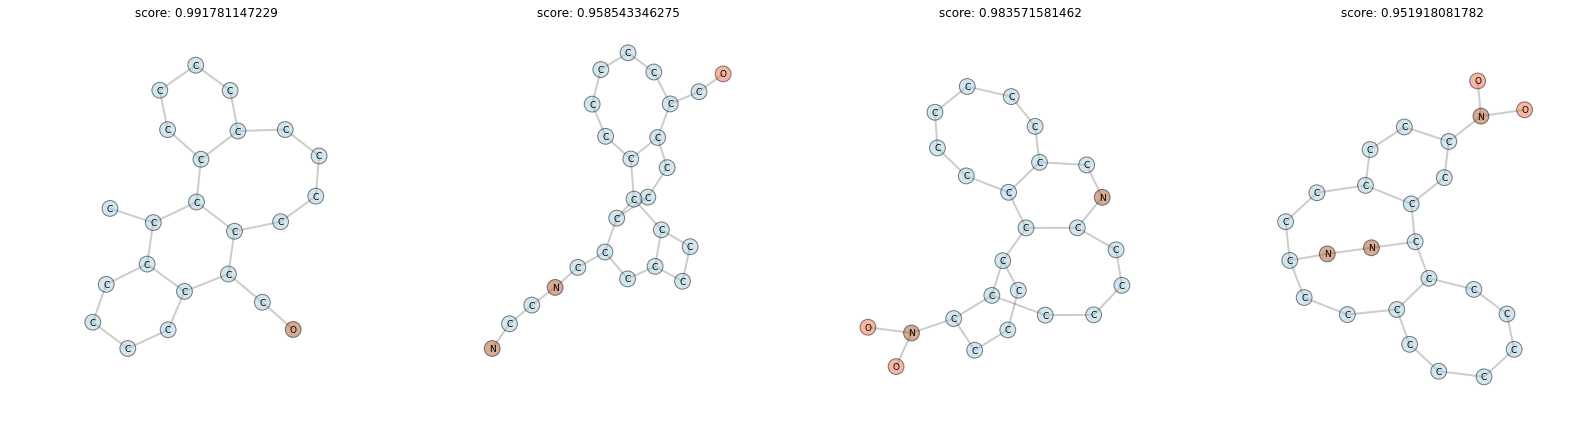

iteration:0
Working with 20 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
iteration:1
Working with 11 cores
iteration:2
Working with 5 cores
delivering isomorphism nr.2
iteration:3
Working with 46 cores
iteration:4
Working with 11 cores
iteration:5
Working with 5 cores
iteration:6
Working with 6 cores
iteration:7
Working with 12 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
delivering isomorphism nr.13
delivering isomorphism nr.14
delivering isomorphism nr.15
delivering isomorphism nr.16
delivering isomorphism nr.17
delivering isomorphism nr.18
delivering isomorphism nr.19
delivering isomorphism nr.20
delivering isomorphi

iteration:0
Working with 46 cores
iteration:1
Working with 6 cores
iteration:2
Working with 46 cores
iteration:3
Working with 23 cores
iteration:4
Working with 65 cores
iteration:5
Working with 32 cores
iteration:6
Working with 46 cores
iteration:7
Working with 10 cores
iteration:8
Working with 77 cores
iteration:9
Working with 11 cores
delivering isomorphism nr.2
iteration:10
Working with 24 cores
iteration:11
Working with 46 cores
iteration:12
Working with 52 cores
iteration:13
Working with 46 cores
iteration:14
Working with 8 cores
iteration:15
Working with 8 cores
iteration:16
Working with 46 cores
iteration:17
Working with 7 cores
iteration:18
Working with 46 cores
iteration:19
Working with 76 cores
iteration:20
Working with 7 cores
iteration:21
Working with 46 cores
iteration:22
Working with 76 cores
iteration:23
Working with 24 cores
iteration:24
Working with 52 cores
iteration:25
Working with 46 cores
iteration:26
Working with 5 cores
iteration:27
Working with 42 cores
iteratio

iteration:0
Working with 5 cores
iteration:1
Working with 5 cores
delivering isomorphism nr.2
iteration:2
Working with 4 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphism nr.6
delivering isomorphism nr.7
delivering isomorphism nr.8
delivering isomorphism nr.9
delivering isomorphism nr.10
delivering isomorphism nr.11
delivering isomorphism nr.12
delivering isomorphism nr.13
delivering isomorphism nr.14
delivering isomorphism nr.15
delivering isomorphism nr.16
delivering isomorphism nr.17
delivering isomorphism nr.18
iteration:3
Working with 5 cores
iteration:4
Working with 6 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
iteration:5
Working with 8 cores
iteration:6
Working with 46 cores
iteration:7
Working with 18 cores
iteration:8
Working with 4 cores
delivering isomorphism nr.2
delivering isomorphism nr.3
delivering isomorphism nr.4
delivering isomorphism nr.5
delivering isomorphi

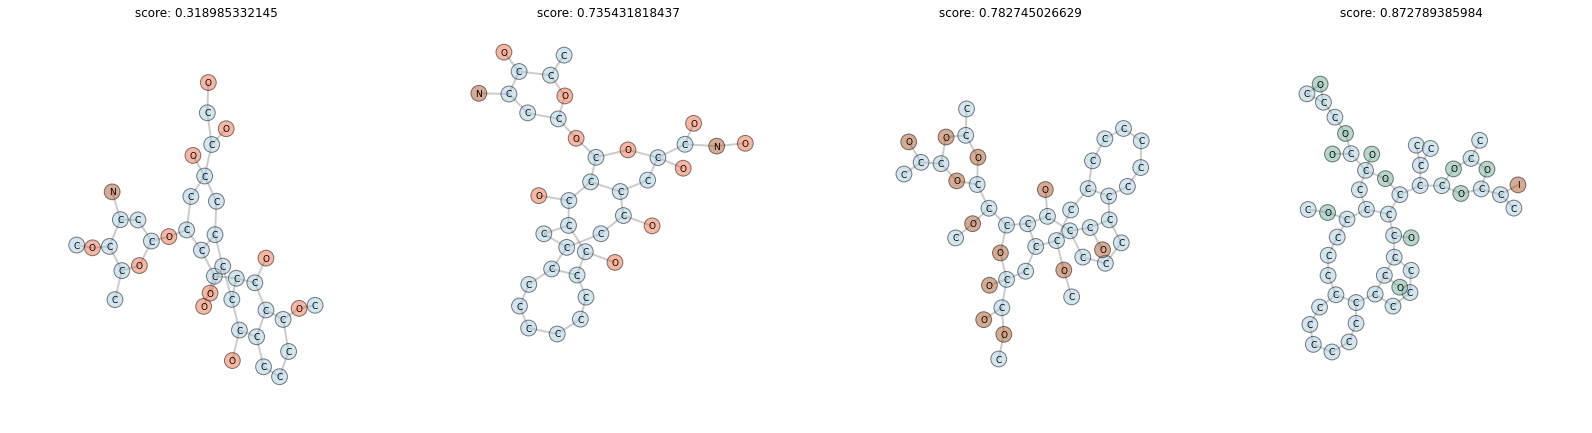

CPU times: user 1min 45s, sys: 6.33 s, total: 1min 51s
Wall time: 1min 58s


In [13]:
%%time
'''
Graph sampling
'''
import os
os.nice(19)
%matplotlib inline
from graphlearn.utils.draw import draw_graph_set
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import graphlearn.utils.draw as myutils
import eden.graph as ge

sampler=gl.GraphLearnSampler()
sampler.load('tmp/demo_300.ge')
graphs = gspan_to_eden( 'bursi.pos.gspan' )
id_start=20
id_end=id_start+29
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50
sampler.feasibility_checker.draw_problem=True
graphs = sampler.sample(graphs,
                        same_radius=False,
                        same_core_size=False,
                        n_samples=4,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        accept_annealing_factor=1.2,
                        probabilistic_core_choice=True,
                        burnout=1,
                        select_cip_max_tries=100,
                        keep_duplicates=False)

from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['C','O','N','P','Cl','Br','S','I'])
    draw_graph_set(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=250,
                   headlinehook= myutils.get_score_of_graph)
    
'''looks like there is a hash collision problem'''

In [10]:
sampler.feasibility_checker.draw_problem

True

In [11]:
%matplotlib inline
from itertools import islice
import numpy as np
step=n_steps
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

We work on this graph


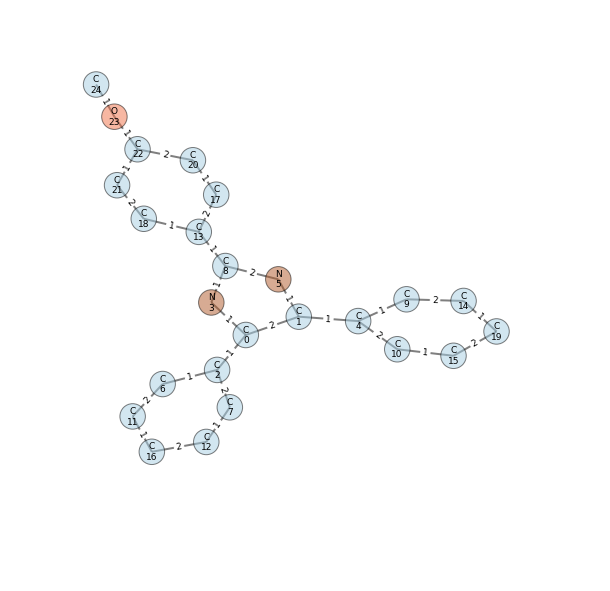

no filter


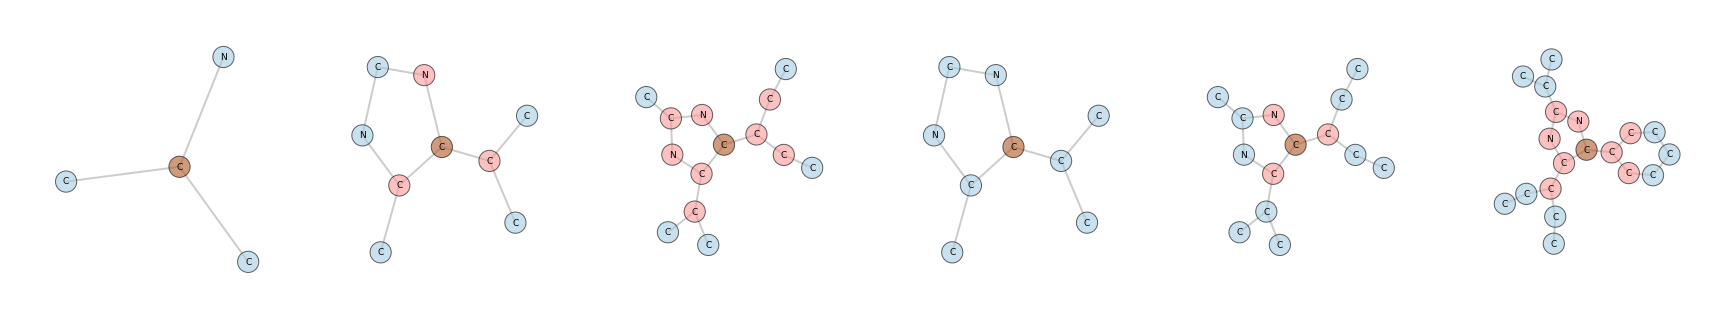

with filter: nothing should appear,,,
with filter but we chose node 2 as root


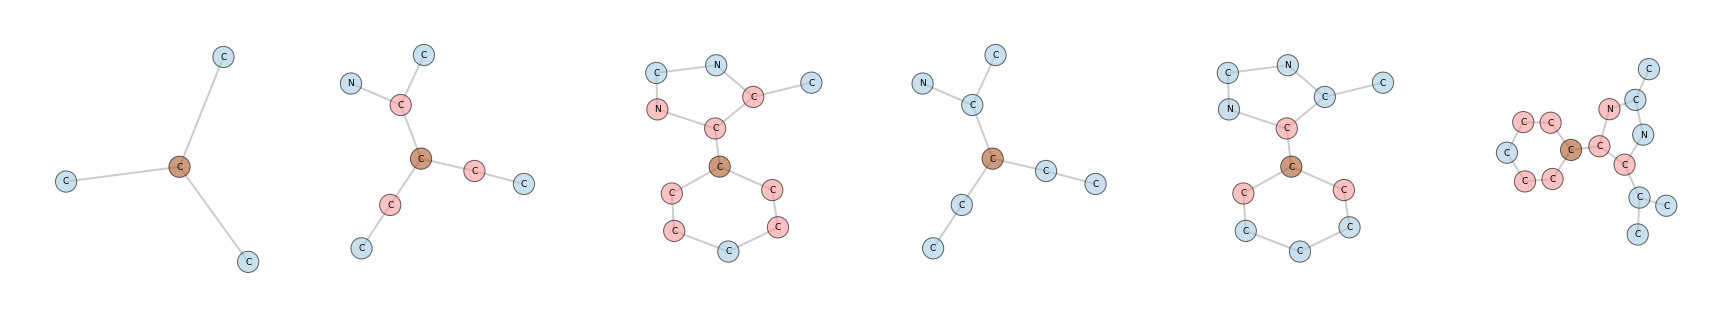

with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up


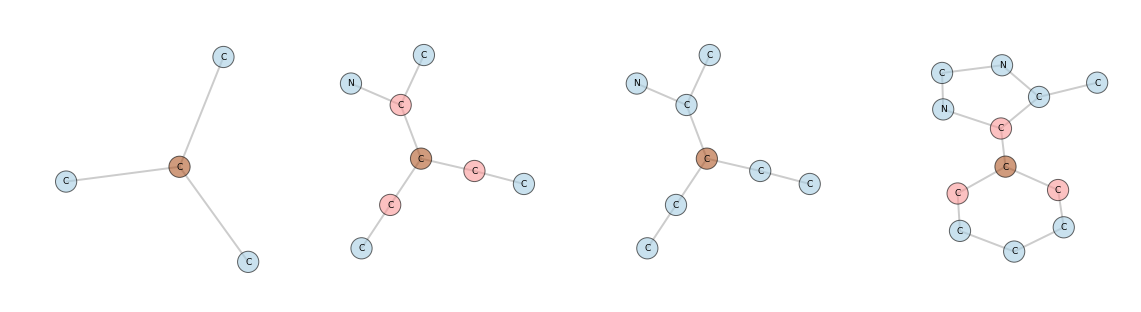

In [12]:
'''
Demonstrating the filter function
'''
import sys
sys.path.append('..')
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
from graphlearn import graphtools as gt
import graphlearn.utils.draw as myutils
import eden.graph as eg
import graphlearn.graphlearn as gl
import numpy as np

from eden.graph import Vectorizer
vectorizer=Vectorizer()

#get a graph
graphs = gspan_to_eden( 'bursi.pos.gspan' )
graph=graphs.next()
from eden.util import display
from eden.modifier.graph.vertex_attributes import colorize  
graphs = colorize([graph],output_attribute = 'color_level', labels = ['C','O','N','P','Cl','Br','S'])    
graph=graphs.next()
print 'We work on this graph'
display.draw_graph(graph, size=10, secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                   vertex_alpha=0.5, node_size=650)


def mark_and_draw(cip):
    graph=myutils.cip_to_graph(cip)
    myutils.draw_graph_set_graphlearn(graph, 
                           n_graphs_per_line=7, size=5, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450)
    
radius_list=[0,1,2]
thickness_list=[1,2]
graph.node[1]['no_root']=True
#lets see.. without filter:
cip=gl.extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'no filter'
mark_and_draw(cip)


# lets do the same but with the filter
cip=gl.extract_core_and_interface(1,graph,filter=gt.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter: nothing should appear,,,'
mark_and_draw(cip)

# filter is ignoring unfiltered things:
cip=gl.extract_core_and_interface(2,graph,filter=gt.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but we chose node 2 as root'
mark_and_draw(cip)

# no core attribute
graph.node[1]["not_in_core"]=True
graph.node[1].pop('no_root')
cip=gl.extract_core_and_interface(2,graph,filter=gt.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up'
mark_and_draw(cip)